<a name="A1">
    
# Analyse des ventes d'une librairie

<br/>

  
**PARTIE 1 - Antoine  :  Analyse des indicateurs de ventes**
 - <a href="#C200">1 - Chiffre d'affaires : indicateurs, graphiques et évolution dans le temps</a>
 - <a href="#C201">2 - Chiffre d'affaires : décomposition en moyenne mobile (tendance globale)</a>
 - <a href="#C202">3 - Zoom sur les références : Tops et Flops</a>
 - <a href="#C203">4 - Zoom sur les références : Répartition par catégorie</a>
 - <a href="#C204">5 - Profils clients : informations</a>
 - <a href="#C205">6 - Profils clients : Répartition du CA</a>

    
**PARTIE 2 - Julie  :  Analyse des Clients**
 - <a href="#C300">1 - Lien entre le genre d’un client et les catégories des livres achetés</a>
 - <a href="#C301">2 - lien entre l’âge des clients et le montant total des achats</a>
 - <a href="#C302">3 - lien entre l’âge des clients et la fréquence d’achat</a>
 - <a href="#C303">4 - lien entre l’âge des clients et la taille du panier moyen</a>
 - <a href="#C304">5 - lien entre l’âge des clients et les catégories des livres achetés</a>    
   
    
    
    
<br/>
    
**Valentin GARCIA**
    
<br/>

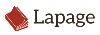

----------------------------------------
<font color='green'>

## Importations des librairies Python utiles et des données


In [1]:
# Importation des librairies Python utiles au projet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime
from matplotlib.gridspec import GridSpec

# Paramétrage Matplotlib
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

# Gestion défaut mineur
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter("ignore")

# Importation des fichiers de données (ici csv)
base = pd.read_csv('3 - Export CSV/base LAPAGE.csv')


# Correction date
base['date'] = pd.to_datetime(base['date'])
base['date'] = pd.to_datetime(base['date'].dt.date)

<a name="C200">
<br/> 
---------------------------------------------------------------------------------------------------------------------------


# PARTIE 1 - Antoine  :  Analyse des indicateurs de ventes
<br/> 
>>> <a href="#A1"> Retour sommaire

----------------------------------------
<font color='green'>

## 1 - Chiffre d'affaires : indicateurs, graphiques et évolution dans le temps


In [2]:
# Création df CA avec date + ventes totales + ventes par catégorie
ca = base.loc[:,['date','price']]
ca['categ_0'] = np.where(base['categ'] == 0 ,base['price'],0)
ca['categ_1'] = np.where(base['categ'] == 1 ,base['price'],0)
ca['categ_2'] = np.where(base['categ'] == 2 ,base['price'],0)

# Agrégation par mois et tri de la df CA 
ca['aaaa-mm'] = ca['date'].dt.strftime('%Y-%m')
ca = ca.groupby(['aaaa-mm'], as_index = False)[['price','categ_0','categ_1','categ_2']].sum()
ca = ca.sort_values('aaaa-mm', ascending = True)

# Valeurs des x et y pour les 2 graphs suivant
x_ca_tot = ca['aaaa-mm']
y_ca_tot = ca['price']
y_categ_0 = ca['categ_0']
y_categ_1 = ca['categ_1']
y_categ_2 = ca['categ_2']

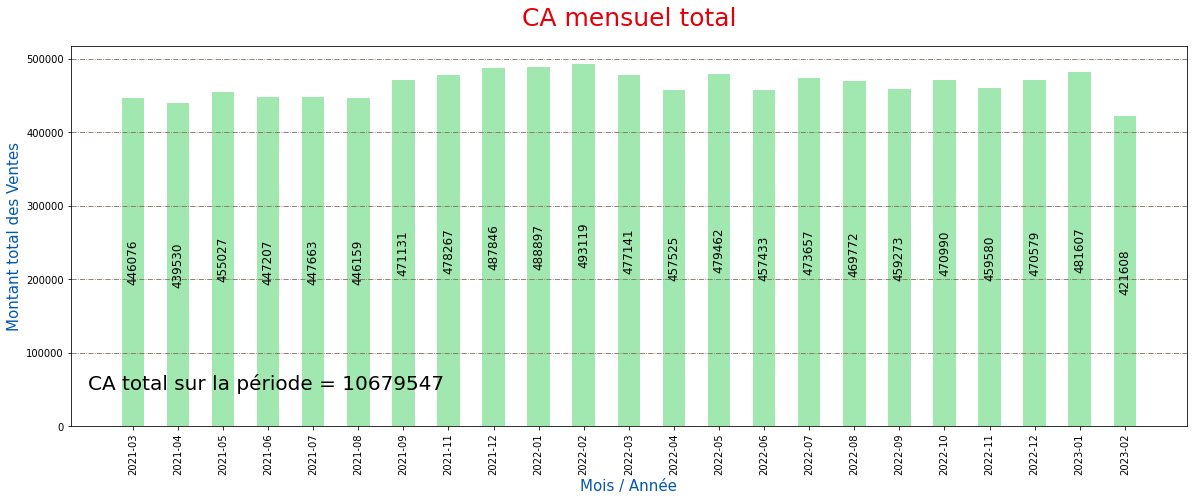

In [3]:
### ------------------------------------ Graph ---------------------------------------  ###
fig = plt.figure(figsize= (20,7))
graph = plt.bar(x_ca_tot , y_ca_tot , color = '#A0E8AF' , width = 0.5, align = 'center')
plt.title("CA mensuel total", color = '#E50007', fontsize = 25, pad = 20)
plt.text(0-1 , 50000 , 'CA total sur la période = ' + str(round(base['price'].sum())), fontsize = 20 , color = 'black')
plt.xlabel("Mois / Année", color = '#0359AA', fontsize = 15)
plt.ylabel("Montant total des Ventes", color = '#0359AA', fontsize = 15)
plt.xticks(x_ca_tot , rotation = 90 ,  fontsize = 10)
plt.grid(axis = 'y' , linestyle = '-.' , color = '#7A6755' )
plt.bar_label(graph , label_type='center' , rotation = 90 , fontsize = 12)
plt.savefig("4 - Export Graphs/Graphique_Antoine_CA_mensuel.png", dpi = 100)
plt.show()

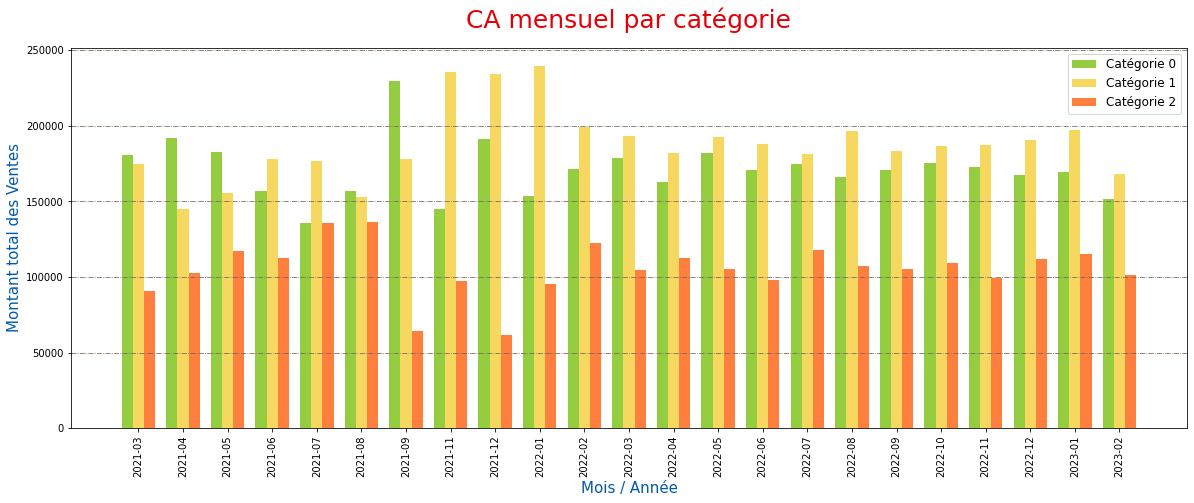

In [4]:
### ------------------------------------ Graph ---------------------------------------  ###
largeur = 0.25
fig = plt.figure(figsize= (20,7))
X_axis = np.arange(len(x_ca_tot))
plt.bar(X_axis - largeur , y_categ_0 , color = '#95CD41' , label = 'Catégorie 0' , width = largeur,)
plt.bar(X_axis , y_categ_1 , color = '#F6D860' , label = 'Catégorie 1' , width = largeur,)
plt.bar(X_axis + largeur, y_categ_2 , color = '#FF7F3F' , label = 'Catégorie 2' , width = largeur,)
plt.title("CA mensuel par catégorie", color = '#E50007', fontsize = 25, pad = 20)
plt.xlabel("Mois / Année", color = '#0359AA', fontsize = 15)
plt.ylabel("Montant total des Ventes", color = '#0359AA', fontsize = 15)
plt.xticks(X_axis, x_ca_tot , rotation = 90)
plt.grid(axis = 'y' , linestyle = '-.' , color = '#7A6755' )
plt.legend(fontsize = 12)
plt.savefig("4 - Export Graphs/Graphique_Antoine_CA_mensuel_par_catégorie.png", dpi = 100)
plt.show()

----------------------------------------
<font color='green'>

## 2 - Chiffre d'affaires : Décomposition en moyenne mobile (tendance globale)


In [5]:
# Création df pour CA moyenne mobile
ca_mm = base.loc[:,['date','price']]

# Groupby par mois,tri et moyenne mobile avec la fonction ROLLING
ca_mm = ca_mm.groupby(['date'], as_index = False)['price'].sum()
ca_mm = ca_mm.sort_values('date', ascending = True)
ca_mm['mm_1_semaine'] = ca_mm['price'].rolling(7).mean()
ca_mm['mm_2_semaine'] = ca_mm['price'].rolling(15).mean()
ca_mm['mm_1_mois'] = ca_mm['price'].rolling(30).mean()
ca_mm['mm_3_mois'] = ca_mm['price'].rolling(90).mean()

# Valeurs pour Graph
date = ca_mm['date']
mm1 = ca_mm['mm_1_semaine']
mm2 = ca_mm['mm_2_semaine']
mm3 = ca_mm['mm_1_mois']
mm4 = ca_mm['mm_3_mois']

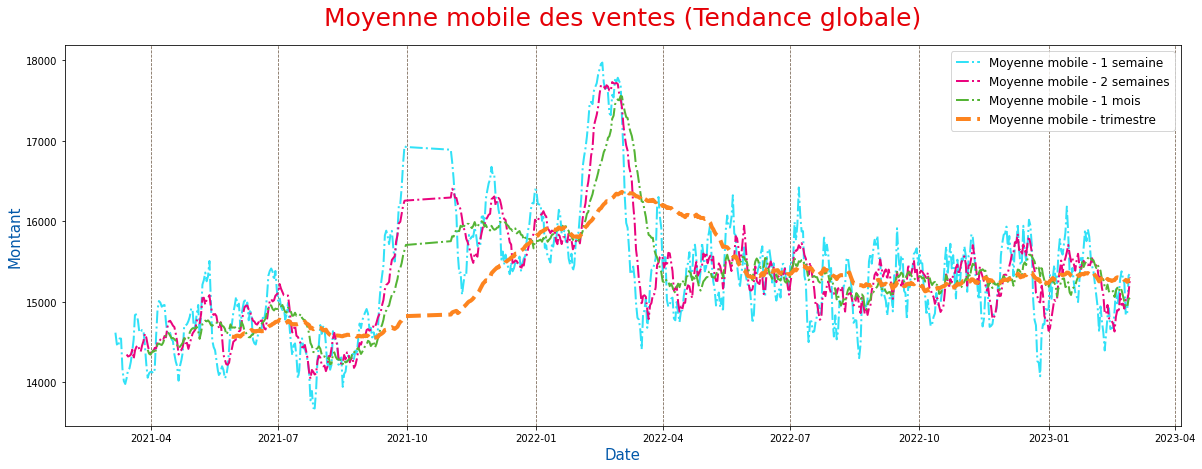


--------------------------   La moyenne mobile trimestrielle semble être la plus lisible et représentative   ---------------------------



In [6]:
### ------------------------------------ Graph ---------------------------------------  ###
plt.subplots(figsize=(20, 7))
plt.plot(date , mm1 , label = 'Moyenne mobile - 1 semaine', linewidth = 2, linestyle = 'dashdot' , color = '#31E1F7')
plt.plot(date , mm2 , label = 'Moyenne mobile - 2 semaines', linewidth = 2, linestyle = 'dashdot' , color = '#EA047E')
plt.plot(date , mm3 , label = 'Moyenne mobile - 1 mois', linewidth = 2 , linestyle = '-.' ,  color = '#54B435')
plt.plot(date , mm4 , label = 'Moyenne mobile - trimestre', linewidth = 4 , linestyle = '--' , color = '#FD841F')
plt.title("Moyenne mobile des ventes (Tendance globale)", color = '#E50007', fontsize = 25, pad = 20)
plt.xlabel("Date", color = '#0359AA', fontsize = 15)
plt.ylabel("Montant", color = '#0359AA', fontsize = 15)
plt.grid(axis = 'x' , linestyle = '--' , color = '#7A6755' , which = 'major')
plt.legend(fontsize = 12)
plt.savefig("4 - Export Graphs/Graphique_Antoine_Moyenne_mobile_ventes.png", dpi = 100)
plt.show()
print('\n--------------------------   La moyenne mobile trimestrielle semble être la plus lisible et représentative   ---------------------------\n')

In [7]:
# CALCUL MOYENNE MOBILE PAR CATEGORIE ET PAR TRIMESTRE

# Création df pour CA par catégorie
ca_mm_0 = base.loc[base['categ'] == 0 , ['date','price']]
ca_mm_1 = base.loc[base['categ'] == 1 , ['date','price']]
ca_mm_2 = base.loc[base['categ'] == 2 , ['date','price']]

# Groupby par mois,tri et moyenne mobile
ca_mm_0 = ca_mm_0.groupby(['date'], as_index = False)['price'].sum()
ca_mm_1 = ca_mm_1.groupby(['date'], as_index = False)['price'].sum()
ca_mm_2 = ca_mm_2.groupby(['date'], as_index = False)['price'].sum()
ca_mm_0 = ca_mm_0.sort_values('date', ascending = True)
ca_mm_1 = ca_mm_1.sort_values('date', ascending = True)
ca_mm_2 = ca_mm_2.sort_values('date', ascending = True)
ca_mm_0['trim'] = ca_mm_0['price'].rolling(90).mean()
ca_mm_1['trim'] = ca_mm_1['price'].rolling(90).mean()
ca_mm_2['trim'] = ca_mm_2['price'].rolling(90).mean()

# Valeurs pour Graph
date = ca_mm['date']
mmt0 = ca_mm_0['trim']
mmt1 = ca_mm_1['trim']
mmt2 = ca_mm_2['trim']

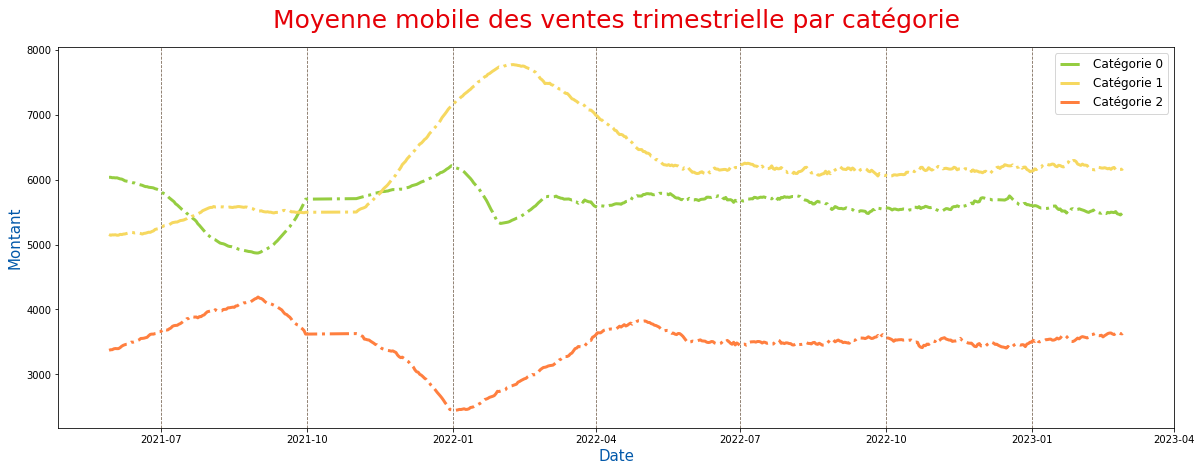


--------------------------   1er trimestre 2022 : Chute sur catégorie 2 compensée par la hausse sur catégorie 1   ---------------------------



In [8]:
### ------------------------------------ Graph ---------------------------------------  ###
plt.subplots(figsize=(20, 7))
plt.plot(date , mmt0 , label = 'Catégorie 0', linewidth = 3, linestyle = 'dashdot' , color = '#95CD41')
plt.plot(date , mmt1 , label = 'Catégorie 1', linewidth = 3 , linestyle = '-.' , color = '#F6D860')
plt.plot(date , mmt2 , label = 'Catégorie 2', linewidth = 3 , linestyle = '-.' , color = '#FF7F3F')
plt.title("Moyenne mobile des ventes trimestrielle par catégorie", color = '#E50007', fontsize = 25, pad = 20)
plt.xlabel("Date", color = '#0359AA', fontsize = 15)
plt.ylabel("Montant", color = '#0359AA', fontsize = 15)
plt.grid(axis = 'x' , linestyle = '--' , color = '#7A6755' )
plt.legend(fontsize = 12)
plt.savefig("4 - Export Graphs/Graphique_Antoine_Moyenne_mobile_ventes_trimestrielle_catégorie.png", dpi = 100)
plt.show()
print('\n--------------------------   1er trimestre 2022 : Chute sur catégorie 2 compensée par la hausse sur catégorie 1   ---------------------------\n')

----------------------------------------
<font color='green'>

## 3 - Zoom sur les références : Tops et Flops


In [9]:
# Importation et travail du fichier 'flop' créé dans le NoteBook NETTOYAGE
flop_0 = pd.read_csv('3 - Export CSV/Base LAPAGE - produit non acheté.csv')
flop_0 = flop_0.loc[:,['id_prod','price','categ']]
flop_0['nb_vente'] = 0  
flop_0['ca_nb'] = 0

# Création df pour top-flop - Agrégation par ID_PROD - Création colonne CA_NB
flop_top = base.groupby(['id_prod','price','categ'], as_index = False).agg(nb_vente = ('id_prod', 'size'))
flop_top['ca_nb'] = flop_top['price'] * flop_top['nb_vente']

# Insertion des invendus
flop_top = pd.concat([flop_0, flop_top], ignore_index = True)

In [10]:
# 100 références des flops (en NB et CA)
flop_top = flop_top.sort_values(by = ['nb_vente','price'], ascending = True)
flop_nb_100 = flop_top.iloc[0:100,:]
flop_top = flop_top.sort_values(by = ['ca_nb'], ascending = True)
flop_ca_100 = flop_top.iloc[0:100,:]

print('#------------------------   Les 100 Flops en nombre de vente   ------------------------------# \n')
flop_nb_100.head(3)

#------------------------   Les 100 Flops en nombre de vente   ------------------------------# 



,id_prod,price,categ,nb_vente,ca_nb
10,0_1620,0.80,0.0,0,0.0
4,0_1014,1.15,0.0,0,0.0
1,0_1780,1.67,0.0,0,0.0


In [66]:
print('#------------------------   Les 100 Flops en CA   ------------------------------# \n\n')
flop_ca_100.head(3)

#------------------------   Les 100 Flops en CA   ------------------------------# 




,id_prod,price,categ,nb_vente,ca_nb
10,0_1620,0.80,0.0,0,0.0
12,2_87,220.99,2.0,0,0.0
14,2_72,141.32,2.0,0,0.0


In [12]:
# 100 références des Tops (en NB et CA)
flop_top = flop_top.sort_values(by = ['nb_vente','price'], ascending = False)
top_nb_100 = flop_top.iloc[0:100,:]
flop_top = flop_top.sort_values(by = ['ca_nb'], ascending = False)
top_ca_100 = flop_top.iloc[0:100,:]

print('#------------------------   Les 100 Tops en nombre de vente   ------------------------------# \n')
top_nb_100.head(3)

#------------------------   Les 100 Tops en nombre de vente   ------------------------------# 



,id_prod,price,categ,nb_vente,ca_nb
2606,1_369,23.99,1.0,2107,50546.93
2656,1_414,23.83,1.0,2035,48494.05
2659,1_417,20.99,1.0,2033,42672.67


In [13]:
print('#------------------------   Les 100 Tops en CA   ------------------------------# \n')
top_ca_100.head(3)

#------------------------   Les 100 Tops en CA   ------------------------------# 



,id_prod,price,categ,nb_vente,ca_nb
3110,2_159,145.99,2.0,607,88615.93
3084,2_135,68.99,2.0,895,61746.05
3060,2_112,67.57,2.0,835,56420.95


In [14]:
print('=====> Export CSV des 4 tableaux')

# -------------------------------- Exports CSV des 100 TOPS et des 100 FLOPS -------------------------------------- #

# Export CSV des flops
flop_nb_100.to_csv('3 - Export CSV/Flop des 100 références (NB de ventes).csv', index = True)
flop_ca_100.to_csv('3 - Export CSV/Flop des 100 références (en CA).csv', index = True)

# Export CSV des Tops
top_nb_100.to_csv('3 - Export CSV/Top des 100 références (NB de ventes).csv', index = True)
top_ca_100.to_csv('3 - Export CSV/Top des 100 références (en CA).csv', index = True)

=====> Export CSV des 4 tableaux


In [15]:
# PRÉPARATION DES 2 GRAPHS NUAGE DE POINTS 

# Agregation df pour top-flop en nb de vente avec calcul CA
flop_top_nb_ca = flop_top.groupby(['nb_vente'], as_index = False).agg(nb_reference = ('nb_vente', 'count'), ca = ('ca_nb', 'sum'))
flop_top_nb_ca = flop_top_nb_ca.sort_values('nb_vente', ascending = True)

# Création de 3 dataframe pour FLOPS, TOPS et entre deux pour graph NB VENTE (limites abritraires réfléchis à l'aide de la df TOP-FLOP triée)
flop_top_nb_ca_bas = flop_top_nb_ca[(flop_top_nb_ca['nb_vente'] <= 10) ]
flop_top_nb_ca_milieu = flop_top_nb_ca[(flop_top_nb_ca['nb_vente'] > 10) & (flop_top_nb_ca['nb_vente'] < 1000)]
flop_top_nb_ca_haut = flop_top_nb_ca[(flop_top_nb_ca['nb_vente'] >= 1000)]

# Création de 3 dataframe pour FLOPS, TOPS et entre deux pour graph CA (limites abritraires réfléchis à l'aide de la df TOP-FLOP triée)
flop_top_nb_ca_bas_ca = flop_top_nb_ca[(flop_top_nb_ca['ca'] <= 10) ]
flop_top_nb_ca_milieu_ca = flop_top_nb_ca[(flop_top_nb_ca['ca'] > 10) & (flop_top_nb_ca['ca'] < 20500)]
flop_top_nb_ca_haut_ca = flop_top_nb_ca[(flop_top_nb_ca['ca'] >= 20500)]

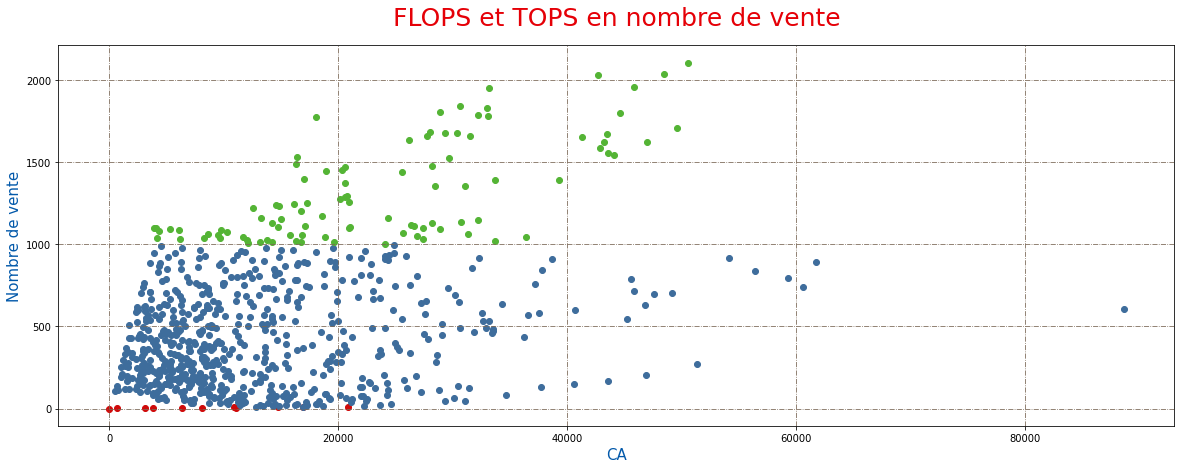


Constation : Les flops en nombre de vente ne sont pas non plus des flops en terme de CA



In [16]:
### ------------------------------------ Graph ---------------------------------------  ###
fig = plt.figure(figsize= (20,7))
plt.scatter(flop_top_nb_ca_bas['ca'].values, flop_top_nb_ca_bas['nb_vente'].values, c = '#CF0A0A')
plt.scatter(flop_top_nb_ca_milieu['ca'].values, flop_top_nb_ca_milieu['nb_vente'].values, c = '#3E6D9C')
plt.scatter(flop_top_nb_ca_haut['ca'].values, flop_top_nb_ca_haut['nb_vente'].values, c = '#54B435')
plt.title("FLOPS et TOPS en nombre de vente", color = '#E50007', fontsize = 25, pad = 20)
plt.xlabel("CA", color = '#0359AA', fontsize = 15)
plt.ylabel("Nombre de vente", color = '#0359AA', fontsize = 15)
plt.grid(axis = 'x' , linestyle = '-.' , color = '#7A6755' )
plt.grid(axis = 'y' , linestyle = '-.' , color = '#7A6755' )
plt.savefig("4 - Export Graphs/Graphique_Antoine_FLOPS_TOPS_nombre_vente.png", dpi = 100)
plt.show()
print('\nConstation : Les flops en nombre de vente ne sont pas non plus des flops en terme de CA\n')

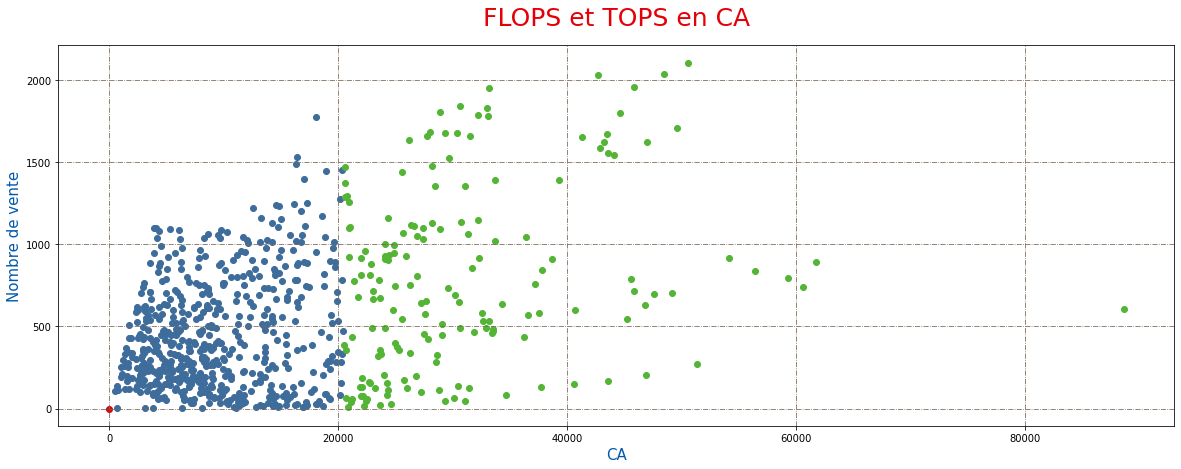

In [17]:
### ------------------------------------ Graph ---------------------------------------  ###
fig = plt.figure(figsize= (20,7))
plt.scatter(flop_top_nb_ca_bas_ca['ca'].values, flop_top_nb_ca_bas_ca['nb_vente'].values, c = '#CF0A0A')
plt.scatter(flop_top_nb_ca_milieu_ca['ca'].values, flop_top_nb_ca_milieu_ca['nb_vente'].values, c = '#3E6D9C')
plt.scatter(flop_top_nb_ca_haut_ca['ca'].values, flop_top_nb_ca_haut_ca['nb_vente'].values, c = '#54B435')
plt.title("FLOPS et TOPS en CA", color = '#E50007', fontsize = 25, pad = 20)
plt.xlabel("CA", color = '#0359AA', fontsize = 15)
plt.ylabel("Nombre de vente", color = '#0359AA', fontsize = 15)
plt.grid(axis = 'x' , linestyle = '-.' , color = '#7A6755' )
plt.grid(axis = 'y' , linestyle = '-.' , color = '#7A6755' )
plt.savefig("4 - Export Graphs/Graphique_Antoine_FLOPS_TOPS_CA.png", dpi = 100)
plt.show()

----------------------------------------
<font color='green'>

## 4 - Zoom sur les références : Répartition par catégorie


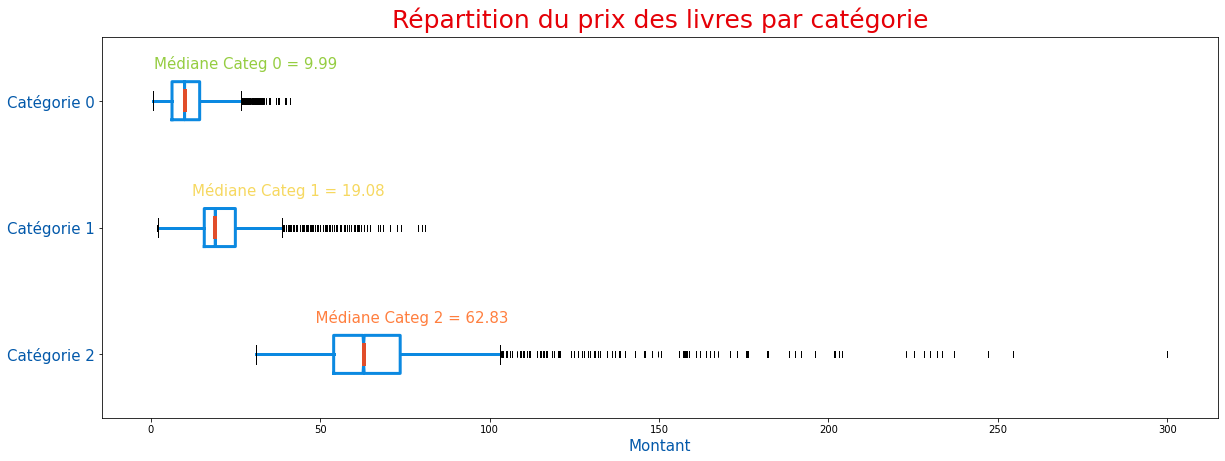


Constation : Les livres de la catégorie 2 sont plus onéreux



In [18]:
# Calcul CA par CATEG
categ_0_price = base.price.loc[base['categ'] == 0]
categ_1_price = base.price.loc[base['categ'] == 1]
categ_2_price = base.price.loc[base['categ'] == 2]
med_cat0 = categ_0_price.median()
med_cat1 = categ_1_price.median()
med_cat2 = categ_2_price.median()

### ------------------------------------ Box-Plot ---------------------------------------  ###

donnee = [categ_2_price , categ_1_price , categ_0_price]
boite = dict( linewidth = 3, color='#0B89E1')
mediane = dict( linewidth = 4, color='#E14D2A')
petit_rond = dict(markerfacecolor='r', marker='|' , color='b')
divers = dict(linewidth = 3, color='#0B89E1')
plt.subplots(figsize=(20, 7))
a = plt.boxplot(donnee, boxprops = boite , notch=True, vert=False , flierprops = petit_rond, medianprops = mediane , whiskerprops = divers , )
plt.title("Répartition du prix des livres par catégorie", color = '#E50007', fontsize = 25, pad = 10)
plt.xlabel("Montant", color = '#0359AA', fontsize = 15)
plt.yticks([1, 2, 3], ['Catégorie 2', 'Catégorie 1', 'Catégorie 0'], fontsize = 15 , color = '#0359AA')
plt.text(1 , 3.25 , 'Médiane Categ 0 = ' + str(med_cat0), fontsize = 15 , color = '#95CD41')
plt.text(1 , 2.25 , '        Médiane Categ 1 = ' + str(med_cat1), fontsize = 15 , color = '#F6D860')
plt.text(1 , 1.25 , '                                  Médiane Categ 2 = ' + str(med_cat2), fontsize = 15 , color = '#FF7F3F')
plt.savefig("4 - Export Graphs/Graphique_Antoine_Répartition_prix_livres_catégorie.png", dpi = 100)
plt.show()
print('\nConstation : Les livres de la catégorie 2 sont plus onéreux\n')

In [19]:
# PRÉPARATION DU PIE ci-après 

# Paramétrage Matplotlib
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'

# Comptage du nombre de références par CATEG 
categ_0 = base.loc[base['categ'] == 0]['id_prod'].nunique()
categ_1 = base.loc[base['categ'] == 1]['id_prod'].nunique()
categ_2 = base.loc[base['categ'] == 2]['id_prod'].nunique()

# Comptage du CA par CATEG 
categ_0_ca = base.loc[base['categ'] == 0]['price'].sum()
categ_1_ca = base.loc[base['categ'] == 1]['price'].sum()
categ_2_ca = base.loc[base['categ'] == 2]['price'].sum()

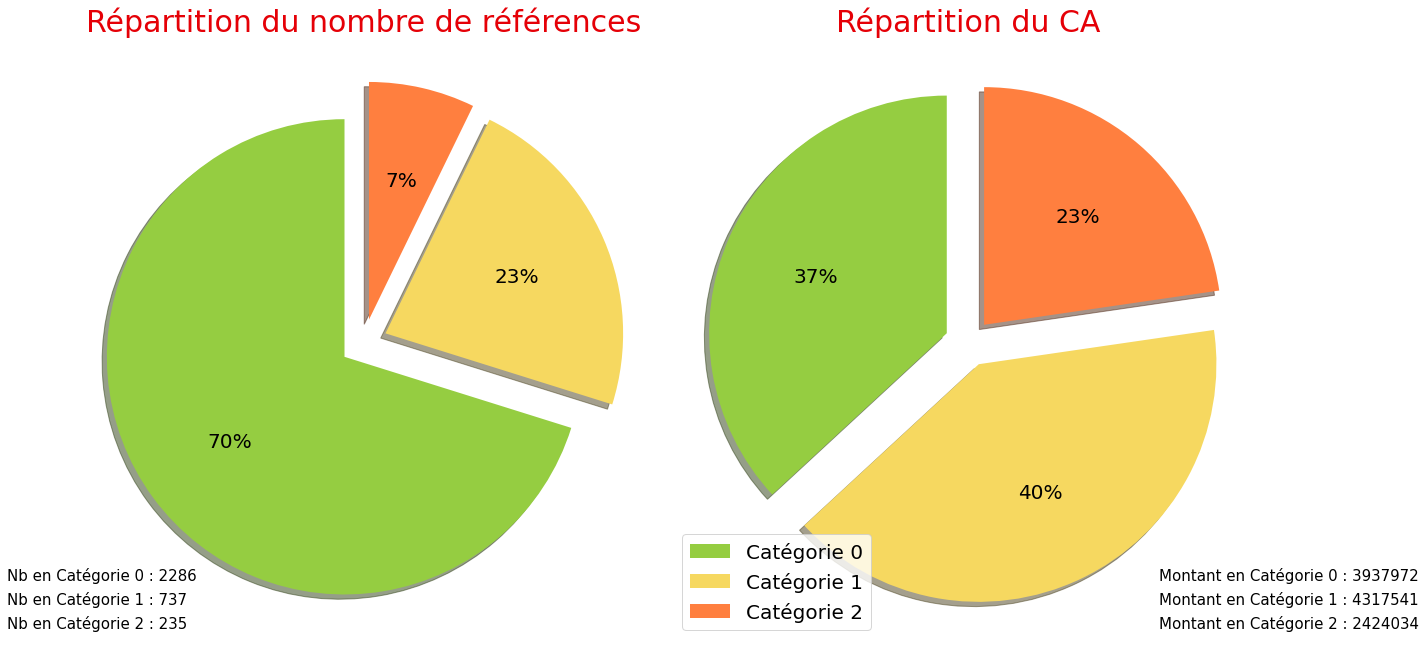


Constation : Le nombre de référence en catégorie 0 représente les 2/3 du total mais seulement 1/3 en CA



In [20]:
### ------------------------------------ Graph ---------------------------------------  ###
titre = ['Catégorie 0', 'Catégorie 1', 'Catégorie 2']
donnees = [categ_0, categ_1, categ_2]
donnees_2 = [categ_0_ca, categ_1_ca, categ_2_ca]
couleurs = ("#95CD41", "#F6D860", "#FF7F3F")
explode = (0.1, 0.1, 0.1)
fig, axs = plt.subplots(1 , 2, figsize=(20, 13))
axs[0].pie(donnees,  autopct = '%1.0f%%'  , shadow = True, explode = explode, colors = couleurs, startangle = 90 , textprops = dict(fontsize = 20))
axs[1].pie(donnees_2, autopct = '%1.0f%%' , shadow = True, explode = explode, colors = couleurs, startangle = 90, textprops = dict(fontsize = 20))
plt.legend(labels = titre, fontsize = 20, loc = 'lower left')
axs[0].text(-1.5 , -1 , 'Nb en Catégorie 0 : ' + str(categ_0), fontsize = 15 )
axs[0].text(-1.5 , -1.1 ,'Nb en Catégorie 1 : ' + str(categ_1), fontsize = 15 )
axs[0].text(-1.5 , -1.2 , 'Nb en Catégorie 2 : ' + str(categ_2), fontsize = 15 )
axs[1].text(0.8 , -1 , 'Montant en Catégorie 0 : ' + str(round(categ_0_ca)), fontsize = 15)
axs[1].text(0.8 , -1.1 , 'Montant en Catégorie 1 : ' + str(round(categ_1_ca)), fontsize = 15)
axs[1].text(0.8 , -1.2 , 'Montant en Catégorie 2 : ' + str(round(categ_2_ca)), fontsize = 15)
axs[0].set_title("Répartition du nombre de références", color = '#E50007', fontsize = 30, pad = 15)
axs[1].set_title("Répartition du CA", color = '#E50007', fontsize = 30, pad = 15)
fig.tight_layout()
plt.savefig("4 - Export Graphs/Graphique_Antoine_Répartition_nombre_CA_références.png", dpi = 100)
plt.show()
print('\nConstation : Le nombre de référence en catégorie 0 représente les 2/3 du total mais seulement 1/3 en CA\n')

----------------------------------------
<font color='green'>

## 5 - Profils clients : informations

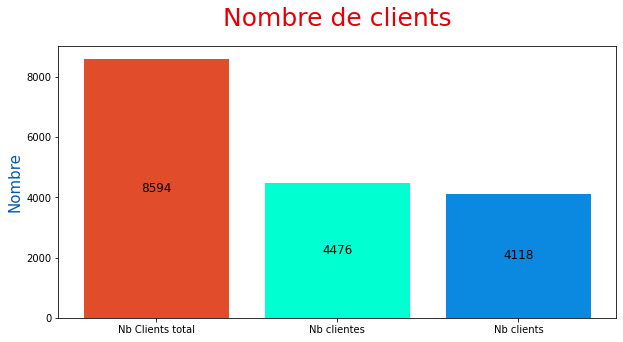


Constation : Répartition presque égale HOMME / FEMME



In [21]:
### ------------------------------------ Graph ---------------------------------------  ###
nb_client = base['client_id'].nunique()
base_f = base.loc[(base['sex'] == 'f')]['client_id'].nunique()
base_m = base.loc[(base['sex'] == 'm')]['client_id'].nunique()
x = ['Nb Clients total' , 'Nb clientes' , 'Nb clients']
y = [nb_client , base_f , base_m]
couleurs = ('#E14D2A' , "#00FFD1", "#0B89E1")
pos_x = np.arange(len(x))
fig = plt.figure(figsize= (10,5))
graph = plt.bar(pos_x , y , color = couleurs)
plt.title("Nombre de clients", color = '#E50007', fontsize = 25, pad = 20)
plt.ylabel("Nombre", color = '#0359AA', fontsize = 15)
plt.xticks(pos_x , x)
plt.bar_label(graph , label_type='center' ,  fontsize = 12)
plt.savefig("4 - Export Graphs/Graphique_Antoine_Nombre_clients.png", dpi = 100)
plt.show()
print('\nConstation : Répartition presque égale HOMME / FEMME\n')

In [22]:
# Création DF par tranche age et par genre (utile pour plusieurs graphs ci-après)
age_18_25 = base.loc[(base['age'] <= 25),:]
age_26_35 = base.loc[(base['age'] > 25) & (base['age'] <= 35),:]
age_36_45 = base.loc[(base['age'] > 35) & (base['age'] <= 45),:]
age_46_55 = base.loc[(base['age'] > 45) & (base['age'] <= 55),:]
age_56_65 = base.loc[(base['age'] > 55) & (base['age'] <= 65),:]
age_sup_65 = base.loc[(base['age'] > 65),:]

age_18_25_f = base.loc[(base['age'] <= 25) & (base['sex'] == 'f'),:]
age_26_35_f = base.loc[(base['age'] > 25) & (base['age'] <= 35) & (base['sex'] == 'f'),:]
age_36_45_f = base.loc[(base['age'] > 35) & (base['age'] <= 45) & (base['sex'] == 'f'),:]
age_46_55_f = base.loc[(base['age'] > 45) & (base['age'] <= 55) & (base['sex'] == 'f'),:]
age_56_65_f = base.loc[(base['age'] > 55) & (base['age'] <= 65) & (base['sex'] == 'f'),:]
age_sup_65_f = base.loc[(base['age'] > 65) & (base['sex'] == 'f'),:]

age_18_25_m = base.loc[(base['age'] <= 25) & (base['sex'] == 'm'),:]
age_26_35_m = base.loc[(base['age'] > 25) & (base['age'] <= 35) & (base['sex'] == 'm'),:]
age_36_45_m = base.loc[(base['age'] > 35) & (base['age'] <= 45) & (base['sex'] == 'm'),:]
age_46_55_m = base.loc[(base['age'] > 45) & (base['age'] <= 55) & (base['sex'] == 'm'),:]
age_56_65_m = base.loc[(base['age'] > 55) & (base['age'] <= 65) & (base['sex'] == 'm'),:]
age_sup_65_m = base.loc[(base['age'] > 65) & (base['sex'] == 'm'),:]

In [23]:
# PREPARATION GRAPH

# Nombre client total
tranche_1 = age_18_25['client_id'].nunique()
tranche_2 = age_26_35['client_id'].nunique()
tranche_3 = age_36_45['client_id'].nunique()
tranche_4 = age_46_55['client_id'].nunique()
tranche_5 = age_56_65['client_id'].nunique()
tranche_6 = age_sup_65['client_id'].nunique()

# Nombre client femme
tranche_1_f = age_18_25_f['client_id'].nunique()
tranche_2_f = age_26_35_f['client_id'].nunique()
tranche_3_f = age_36_45_f['client_id'].nunique()
tranche_4_f = age_46_55_f['client_id'].nunique()
tranche_5_f = age_56_65_f['client_id'].nunique()
tranche_6_f = age_sup_65_f['client_id'].nunique()

# Nombre client homme
tranche_1_m = age_18_25_m['client_id'].nunique()
tranche_2_m = age_26_35_m['client_id'].nunique()
tranche_3_m = age_36_45_m['client_id'].nunique()
tranche_4_m = age_46_55_m['client_id'].nunique()
tranche_5_m = age_56_65_m['client_id'].nunique()
tranche_6_m = age_sup_65_m['client_id'].nunique()

# Données Graph
tranche = ['18-25 ans' , '26-35 ans' , '36-45 ans' , '46-55 ans' , '56-65 ans' , 'Sup à 65 ans']
nb_client_total = [tranche_1 , tranche_2 , tranche_3 , tranche_4 , tranche_5 , tranche_6]
nb_client_femme = [tranche_1_f , tranche_2_f , tranche_3_f , tranche_4_f , tranche_5_f , tranche_6_f]
nb_client_homme = [tranche_1_m , tranche_2_m , tranche_3_m , tranche_4_m , tranche_5_m , tranche_6_m]
d_0 = {'Tranche': tranche, 'Nb client total': nb_client_total , 'Nb client femme': nb_client_femme, 'Nb client homme': nb_client_homme}
nb_client_tranche = pd.DataFrame(data = d_0, index = range(6))

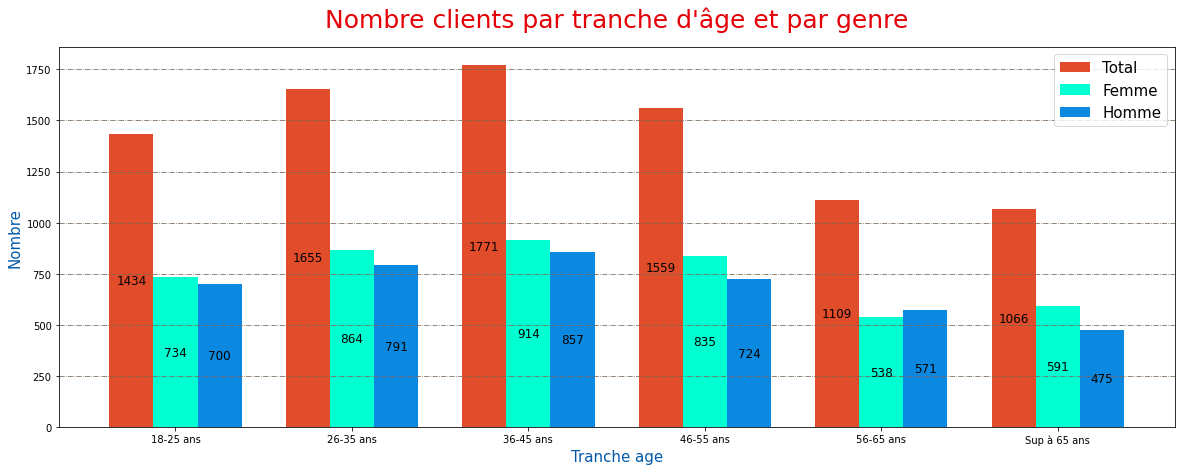

In [24]:
### ------------------------------------ Graph ---------------------------------------  ###
largeur = 0.25
x = nb_client_tranche['Tranche']
y_1 = nb_client_tranche['Nb client total']
y_2 = nb_client_tranche['Nb client femme']
y_3 = nb_client_tranche['Nb client homme']
pos_x = np.arange(len(x))
fig = plt.figure(figsize= (20,7))
graph1 = plt.bar(pos_x - largeur , y_1 , width = largeur , color = '#E14D2A')
graph2 = plt.bar(pos_x , y_2 , width = largeur , color = '#00FFD1')
graph3 = plt.bar(pos_x + largeur, y_3 , width = largeur , color = '#0B89E1')
plt.title("Nombre clients par tranche d'âge et par genre", color = '#E50007', fontsize = 25, pad = 20)
plt.xlabel('Tranche age', color = '#0359AA', fontsize = 15)
plt.ylabel("Nombre", color = '#0359AA', fontsize = 15)
plt.xticks(pos_x , x)
plt.grid(axis = 'y' , linestyle = '-.' , color = '#7A6755' )
plt.legend(labels = ['Total' , 'Femme', 'Homme'], fontsize = 15, loc = 'upper right')
plt.bar_label(graph1 , label_type='center' ,  fontsize = 12)
plt.bar_label(graph2 , label_type='center' ,  fontsize = 12)
plt.bar_label(graph3 , label_type='center' ,  fontsize = 12)
plt.savefig("4 - Export Graphs/Graphique_Antoine_Nombre_clients_tranche_age_genre.png", dpi = 100)
plt.show()

----------------------------------------
<font color='green'>

## 6 - Profils clients : Répartition du CA

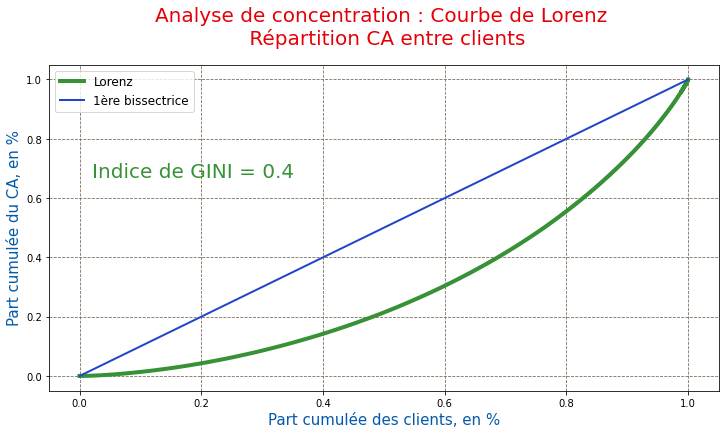


Constation : répartition inégale des achats entre client



In [25]:
# Somme achat par client
client_ca = base.groupby(base['client_id'])['price'].sum()

# Calcul Lorentz
lorenz = np.cumsum(np.sort(client_ca)) / client_ca.sum()
lorenz = np.append([0],lorenz)
taille = len(client_ca)

# Calcul indice de Gini
AUC = (lorenz.sum() -lorenz[-1]/2 - lorenz[0]/2) / taille 
S = 0.5 - AUC 
gini_ca = round(2*S,2)

### ---------------------------- Courbe de Lorentz --------------------------------------###
plt.subplots(figsize=(12, 6))
xaxis = np.linspace(0-1 / taille, 1 + 1 / taille, taille + 1)
plt.plot(xaxis , lorenz , drawstyle = 'steps-post' , label = 'Lorenz', linewidth = 4 , color = '#379237' )
plt.plot([0,1], [0,1] , label = '1ère bissectrice', linewidth = 2 , color = '#2146C7')
plt.legend(fontsize = 12)
plt.title("Analyse de concentration : Courbe de Lorenz \n Répartition CA entre clients", color = '#E50007', fontsize = 20, pad = 20)
plt.xlabel("Part cumulée des clients, en %", color = '#0359AA', fontsize = 15)
plt.ylabel("Part cumulée du CA, en %", color = '#0359AA', fontsize = 15)
plt.grid( linestyle = '--' , color = '#7A6755' )
plt.text(0.02 , 0.67 , 'Indice de GINI = ' + str(gini_ca), fontsize = 20 , color = '#379237')
plt.savefig("4 - Export Graphs/Graphique_Antoine_Courbe_Lorenz_Répartition_CA.png", dpi = 100)
plt.show()
print('\nConstation : répartition inégale des achats entre client\n')

<a name="C300">
<br/> 
---------------------------------------------------------------------------------------------------------------------------


# PARTIE 2 - Julie  :  Analyse des Clients
<br/> 
>>> <a href="#A1"> Retour sommaire

----------------------------------------
<font color='green'>

## 1 - Lien entre le genre d’un client et les catégories des livres achetés

In [26]:
# Création df pour Répartition du nombre de référence acheté par genre
categ_0_f = base.loc[(base['categ'] == 0) & (base['sex'] == 'f')]['sex'].count()
categ_0_m = base.loc[(base['categ'] == 0) & (base['sex'] == 'm')]['sex'].count()
categ_1_f = base.loc[(base['categ'] == 1) & (base['sex'] == 'f')]['sex'].count()
categ_1_m = base.loc[(base['categ'] == 1) & (base['sex'] == 'm')]['sex'].count()
categ_2_f = base.loc[(base['categ'] == 2) & (base['sex'] == 'f')]['sex'].count()
categ_2_m = base.loc[(base['categ'] == 2) & (base['sex'] == 'm')]['sex'].count()

# Création df pour Répartition CA par genre
categ_0_f_ca = base.loc[(base['categ'] == 0) & (base['sex'] == 'f')]['price'].sum()
categ_0_m_ca = base.loc[(base['categ'] == 0) & (base['sex'] == 'm')]['price'].sum()
categ_1_f_ca = base.loc[(base['categ'] == 1) & (base['sex'] == 'f')]['price'].sum()
categ_1_m_ca= base.loc[(base['categ'] == 1) & (base['sex'] == 'm')]['price'].sum()
categ_2_f_ca = base.loc[(base['categ'] == 2) & (base['sex'] == 'f')]['price'].sum()
categ_2_m_ca = base.loc[(base['categ'] == 2) & (base['sex'] == 'm')]['price'].sum()

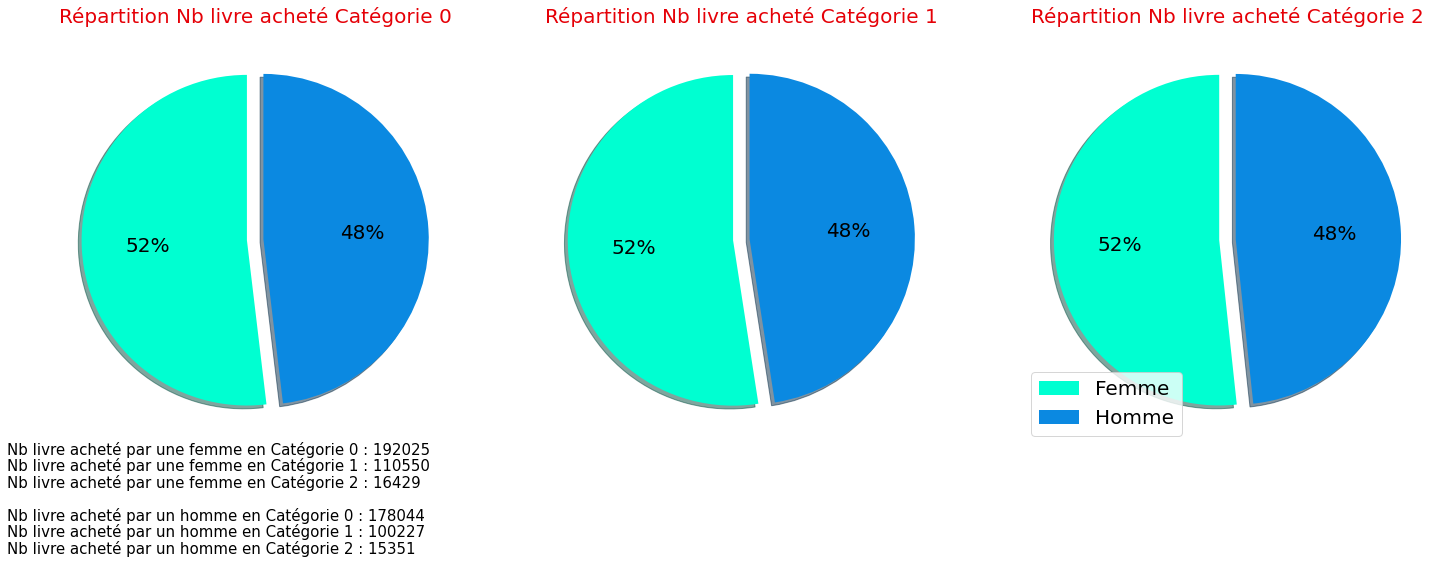

In [27]:
### ------------------------------------ Graph ---------------------------------------  ###
titre = ['Femme', 'Homme']
donnees_0 = [categ_0_f, categ_0_m]
donnees_1 = [categ_1_f, categ_1_m]
donnees_2 = [categ_2_f, categ_2_m]
couleurs = ("#00FFD1", "#0B89E1")
explode = (0.05, 0.05)
fig, axs = plt.subplots(1 , 3, figsize=(20, 13))
axs[0].pie(donnees_0,  autopct = '%1.0f%%' , shadow = True, explode = explode, colors = couleurs, startangle = 90 , textprops = dict(fontsize = 20))
axs[1].pie(donnees_1, autopct = '%1.0f%%' , shadow = True, explode = explode, colors = couleurs, startangle = 90, textprops = dict(fontsize = 20))
axs[2].pie(donnees_2,  autopct = '%1.0f%%' , shadow = True, explode = explode, colors = couleurs, startangle = 90 , textprops = dict(fontsize = 20))
axs[0].set_title("Répartition Nb livre acheté Catégorie 0", color = '#E50007', fontsize = 20, pad = 10)
axs[1].set_title("Répartition Nb livre acheté Catégorie 1", color = '#E50007', fontsize = 20, pad = 10)
axs[2].set_title("Répartition Nb livre acheté Catégorie 2", color = '#E50007', fontsize = 20, pad = 10)
axs[0].text(-1.5 , -1.3 , 'Nb livre acheté par une femme en Catégorie 0 : ' + str(categ_0_f), fontsize = 15 )
axs[0].text(-1.5 , -1.4 ,'Nb livre acheté par une femme en Catégorie 1 : ' + str(categ_1_f), fontsize = 15 )
axs[0].text(-1.5 , -1.5 , 'Nb livre acheté par une femme en Catégorie 2 : ' + str(categ_2_f), fontsize = 15 )
axs[0].text(-1.5 , -1.7 , 'Nb livre acheté par un homme en Catégorie 0 : ' + str(categ_0_m), fontsize = 15 )
axs[0].text(-1.5 , -1.8 ,'Nb livre acheté par un homme en Catégorie 1 : ' + str(categ_1_m), fontsize = 15 )
axs[0].text(-1.5 , -1.9 , 'Nb livre acheté par un homme en Catégorie 2 : ' + str(categ_2_m), fontsize = 15 )
plt.legend(labels = titre, fontsize = 20, loc = 'lower left')
fig.tight_layout()
plt.savefig("4 - Export Graphs/Graphique_Julie_Répartition_Nombre_livre_acheté_catégorie.png", dpi = 100)
plt.show()

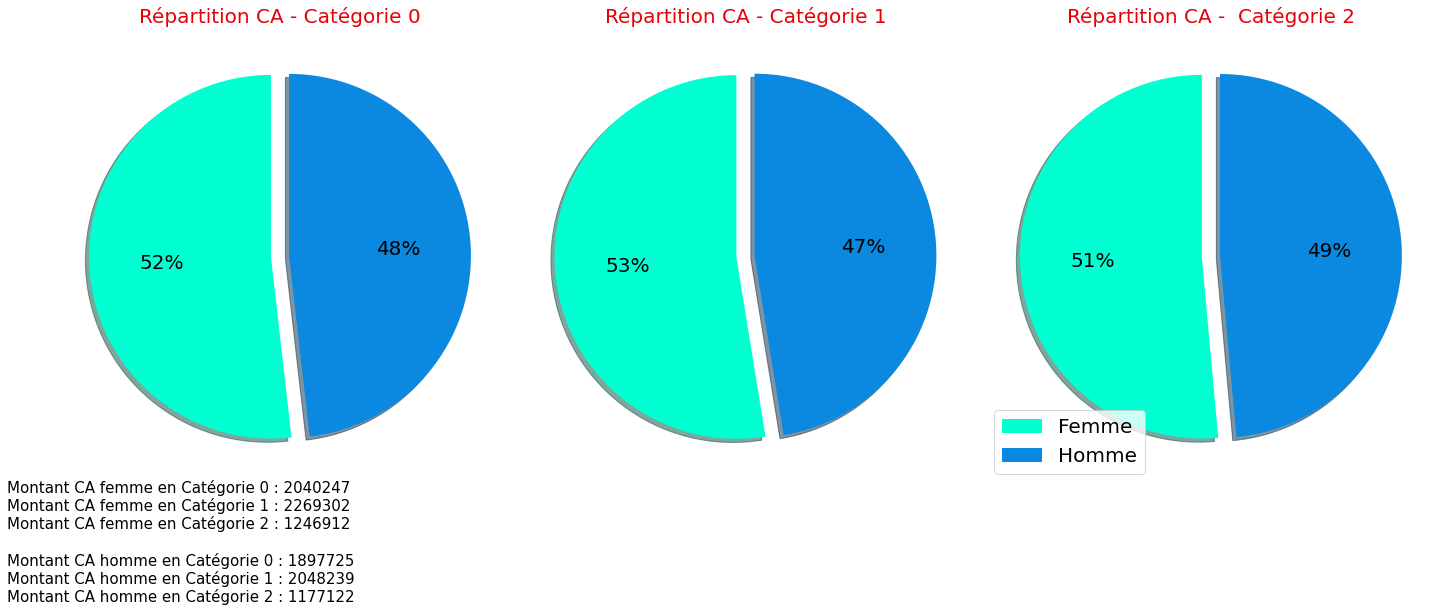

In [28]:
### ------------------------------------ Graph ---------------------------------------  ###

titre = ['Femme', 'Homme']
donnees_0 = [categ_0_f_ca, categ_0_m_ca]
donnees_1 = [categ_1_f_ca, categ_1_m_ca]
donnees_2 = [categ_2_f_ca, categ_2_m_ca]
couleurs = ("#00FFD1", "#0B89E1")
explode = (0.05, 0.05)
fig, axs = plt.subplots(1 , 3, figsize=(20, 13))
axs[0].pie(donnees_0,  autopct = '%1.0f%%' , shadow = True, explode = explode, colors = couleurs, startangle = 90 , textprops = dict(fontsize = 20))
axs[1].pie(donnees_1, autopct = '%1.0f%%' , shadow = True, explode = explode, colors = couleurs, startangle = 90, textprops = dict(fontsize = 20))
axs[2].pie(donnees_2,  autopct = '%1.0f%%' , shadow = True, explode = explode, colors = couleurs, startangle = 90 , textprops = dict(fontsize = 20))
axs[0].set_title("Répartition CA - Catégorie 0", color = '#E50007', fontsize = 20)
axs[1].set_title("Répartition CA - Catégorie 1", color = '#E50007', fontsize = 20)
axs[2].set_title("Répartition CA -  Catégorie 2", color = '#E50007', fontsize = 20)
axs[0].text(-1.5 , -1.3 , 'Montant CA femme en Catégorie 0 : ' + str(round(categ_0_f_ca)), fontsize = 15 )
axs[0].text(-1.5 , -1.4 , 'Montant CA femme en Catégorie 1 : ' + str(round(categ_1_f_ca)), fontsize = 15 )
axs[0].text(-1.5 , -1.5 , 'Montant CA femme en Catégorie 2 : ' + str(round(categ_2_f_ca)), fontsize = 15 )
axs[0].text(-1.5 , -1.7 , 'Montant CA homme en Catégorie 0 : ' + str(round(categ_0_m_ca)), fontsize = 15 )
axs[0].text(-1.5 , -1.8 , 'Montant CA homme en Catégorie 1 : ' + str(round(categ_1_m_ca)), fontsize = 15 )
axs[0].text(-1.5 , -1.9 , 'Montant CA homme en Catégorie 2 : ' + str(round(categ_2_m_ca)), fontsize = 15 )
plt.legend(labels = titre, fontsize = 20, loc = 'lower left')
fig.tight_layout()
plt.savefig("4 - Export Graphs/Graphique_Julie_Répartition_CA_Catégorie.png", dpi = 100)
plt.show()

<font color='red'>  

### Tests statistiques : Genre du client et catégorie des livres achetés   
  
 
 
Données d'entrées :  
    - Genre client (M, F) : variable qualitative nominale  
    - Catégorie livre (0, 1 ou 2) : variable qualitative nominale  
  
=> Test de l'indépendance entre ces deux variables catégorielles  
  
-------------> Application du Test de Chi-2 d'indépendance
  
  


In [29]:
# Création du tableau des contingences sur le CA
ca0 = base.loc[(base['categ'] == 0)]['price'].sum()
ca1 = base.loc[(base['categ'] == 1)]['price'].sum()
ca2 = base.loc[(base['categ'] == 2)]['price'].sum()

ca0f = round(categ_0_f_ca/ca0 * 100)
ca1f = round(categ_1_f_ca/ca1 * 100)
ca2f = round(categ_2_f_ca/ca2 * 100)
ca0m = round(categ_0_m_ca/ca0 * 100)
ca1m = round(categ_1_m_ca/ca1 * 100)
ca2m = round(categ_2_m_ca/ca2 * 100)

cont = pd.DataFrame([[ca0f , ca1f, ca2f , ca0f+ca1f+ca2f] , [ca0m , ca1m, ca2m , ca0m+ca1m+ca2m] , [100 , 100 , 100 , 300]], 
                      index = ['Femme', 'Homme' , 'Total'], columns = ['Categ_0', 'Categ_1', 'Categ_2', 'Total'])
#cont = np.array([[ca0f , ca1f, ca2f , ca0f+ca1f+ca2f] , [ca0m , ca1m, ca2m , ca0m+ca1m+ca2m] , [100 , 100 , 100 , 300]])  
print('Hypothèse nulle (H0): Il n’y a pas de lien entre le genre du client et la catégorie des livres achetés')
print('Hypothèse alternative (H1): Il y a un lien entre le genre du client et la catégorie des livres achetés\n')

print('=> Tableau de contingence : \n')
cont

Hypothèse nulle (H0): Il n’y a pas de lien entre le genre du client et la catégorie des livres achetés
Hypothèse alternative (H1): Il y a un lien entre le genre du client et la catégorie des livres achetés

=> Tableau de contingence : 



,Categ_0,Categ_1,Categ_2,Total
Femme,52,53,51,156
Homme,48,47,49,144
Total,100,100,100,300


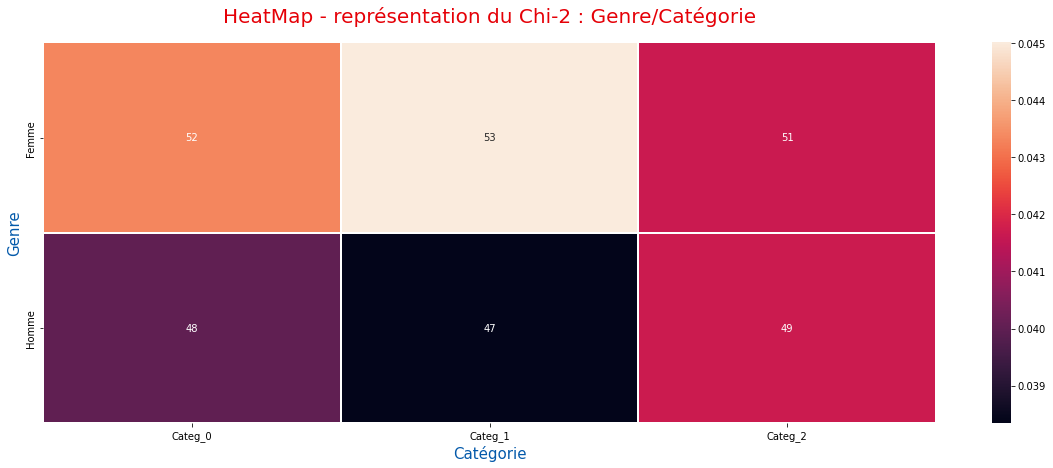

In [30]:
#  Heatmap avec seaborn
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(base)
indep = tx.dot(ty) / n

plt.figure(figsize=(20, 7))
c = cont.fillna(0)
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
ax = sns.heatmap(table.iloc[:-1,:-1] , annot=c.iloc[:-1,:-1] , linewidths=2 )
plt.title("HeatMap - représentation du Chi-2 : Genre/Catégorie", color = '#E50007', fontsize = 20, pad = 20)
plt.xlabel("Catégorie", color = '#0359AA', fontsize = 15)
plt.ylabel("Genre", color = '#0359AA', fontsize = 15)
plt.savefig("4 - Export Graphs/Graphique_Julie_HeatMap_Test_Genre_Catégorie.png", dpi = 100)
plt.show()


In [31]:
# Test de Chi-2 avec SCIPY
alpha = 0.05
print('---------------   Test de Chi-2: indépendance entre 2 variables   --------------- \n')

print('Définition du seuil de décision : alpha =',alpha, 'soit', round(alpha * 100),'% \n')
chi_2, p_valeur, degre, tab_att = stats.chi2_contingency(cont)
print('Calcul du Chi-2 =', round(chi_2 , 2))
print('Calcul du degré de liberté (distribution du chi-deux) =', degre)
print('Calcul de la p-valeur (à l\'aide de la courbe de densité de la loi du chi2 à 6 degrés de liberté ) =', round(p_valeur,5))

print('\n----RESULTAT----    p-valeur > alpha  =>  l\'hypothèse H0 est conservée')
print('On ne peut pas considérer qu\'il y ai une correlation entre le Genre et la catégorie d\'achat')

---------------   Test de Chi-2: indépendance entre 2 variables   --------------- 

Définition du seuil de décision : alpha = 0.05 soit 5 % 

Calcul du Chi-2 = 0.08
Calcul du degré de liberté (distribution du chi-deux) = 6
Calcul de la p-valeur (à l'aide de la courbe de densité de la loi du chi2 à 6 degrés de liberté ) = 0.99999

----RESULTAT----    p-valeur > alpha  =>  l'hypothèse H0 est conservée
On ne peut pas considérer qu'il y ai une correlation entre le Genre et la catégorie d'achat


----------------------------------------
<font color='green'>

## 2 - lien entre l’âge des clients et le montant total des achats

In [32]:

# Valeurs achat total
tranche_1 = age_18_25['price'].sum().astype(int)
tranche_2 = age_26_35['price'].sum().astype(int)
tranche_3 = age_36_45['price'].sum().astype(int)
tranche_4 = age_46_55['price'].sum().astype(int)
tranche_5 = age_56_65['price'].sum().astype(int)
tranche_6 = age_sup_65['price'].sum().astype(int)

# Valeurs achat femme
tranche_1_f = age_18_25_f['price'].sum().astype(int)
tranche_2_f = age_26_35_f['price'].sum().astype(int)
tranche_3_f = age_36_45_f['price'].sum().astype(int)
tranche_4_f = age_46_55_f['price'].sum().astype(int)
tranche_5_f = age_56_65_f['price'].sum().astype(int)
tranche_6_f = age_sup_65_f['price'].sum().astype(int)

# Valeurs achat homme
tranche_1_m = age_18_25_m['price'].sum().astype(int)
tranche_2_m = age_26_35_m['price'].sum().astype(int)
tranche_3_m = age_36_45_m['price'].sum().astype(int)
tranche_4_m = age_46_55_m['price'].sum().astype(int)
tranche_5_m = age_56_65_m['price'].sum().astype(int)
tranche_6_m = age_sup_65_m['price'].sum().astype(int)

tranche = ['18-25 ans' , '26-35 ans' , '36-45 ans' , '46-55 ans' , '56-65 ans' , 'Sup à 65 ans']
achat_age_total = [tranche_1 , tranche_2 , tranche_3 , tranche_4 , tranche_5 , tranche_6]
achat_age_femme = [tranche_1_f , tranche_2_f , tranche_3_f , tranche_4_f , tranche_5_f , tranche_6_f]
achat_age_homme = [tranche_1_m , tranche_2_m , tranche_3_m , tranche_4_m , tranche_5_m , tranche_6_m]
d_1 = {'Tranche': tranche, 'Achat total': achat_age_total , 'Achat femme': achat_age_femme, 'Achat homme': achat_age_homme}
achat_tranche = pd.DataFrame(data = d_1, index = range(6))

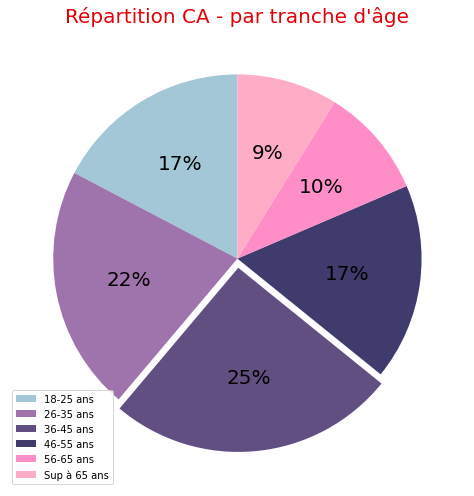

In [33]:
### ------------------------------------ Graph ---------------------------------------  ###
titre = ['18-25 ans' , '26-35 ans' , '36-45 ans' , '46-55 ans' , '56-65 ans' , 'Sup à 65 ans']
donnees_t = [tranche_1 , tranche_2 , tranche_3 , tranche_4 , tranche_5 , tranche_6]
couleurs = ("#A3C7D6", "#9F73AB" , "#624F82" ,"#3F3B6C" , "#FF8DC7" , "#FFACC7" , "#FFB9B9")
explode = (0, 0, 0.05 , 0 , 0, 0)
fig, axs= plt.subplots(figsize=(10, 7))
axs.pie(donnees_t,  autopct = '%1.0f%%' , shadow = False, startangle = 90 , explode = explode , colors = couleurs , textprops = dict(fontsize = 20))
axs.set_title("Répartition CA - par tranche d'âge", color = '#E50007', fontsize = 20)
plt.legend(labels = titre, fontsize = 10, loc = 'lower left')
fig.tight_layout()
plt.savefig("4 - Export Graphs/Graphique_Julie_Répartition_CA_tranche_age.png", dpi = 100)
plt.show()

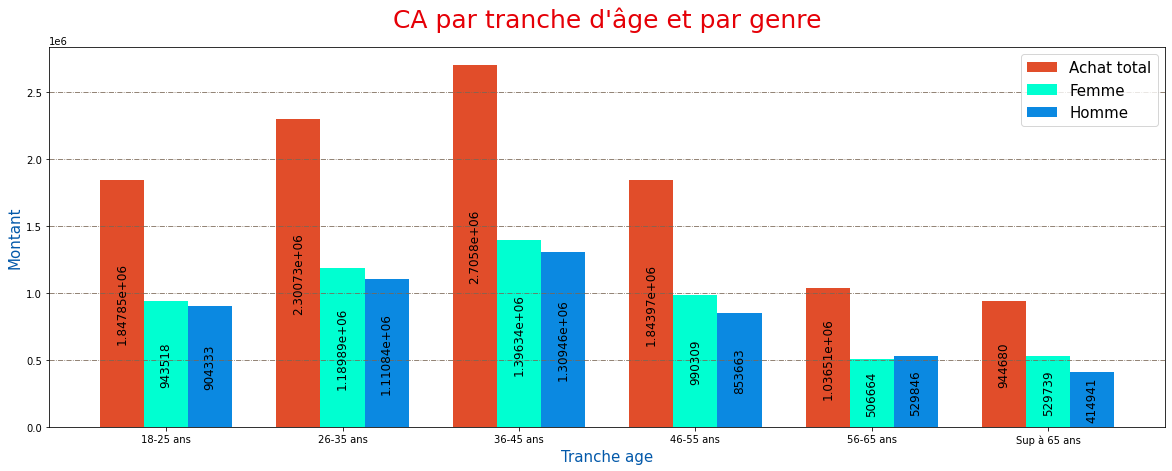

In [34]:
### ------------------------------------ Graph ---------------------------------------  ###
largeur = 0.25
x = achat_tranche['Tranche']
y_1 = achat_tranche['Achat total']
y_2 = achat_tranche['Achat femme']
y_3 = achat_tranche['Achat homme']
pos_x = np.arange(len(x))
fig = plt.figure(figsize= (20,7))
graph1 = plt.bar(pos_x - largeur , y_1 , width = largeur , color = '#E14D2A')
graph2 = plt.bar(pos_x , y_2 , width = largeur , color = '#00FFD1')
graph3 = plt.bar(pos_x + largeur, y_3 , width = largeur , color = '#0B89E1')
plt.title("CA par tranche d'âge et par genre", color = '#E50007', fontsize = 25, pad = 20)
plt.xlabel('Tranche age', color = '#0359AA', fontsize = 15)
plt.ylabel("Montant", color = '#0359AA', fontsize = 15)
plt.xticks(pos_x , x)
plt.grid(axis = 'y' , linestyle = '-.' , color = '#7A6755' )
plt.legend(labels = ['Achat total' , 'Femme', 'Homme'], fontsize = 15, loc = 'upper right')
plt.bar_label(graph1 , label_type='center' , rotation = 90 , fontsize = 12)
plt.bar_label(graph2 , label_type='center' , rotation = 90 , fontsize = 12)
plt.bar_label(graph3 , label_type='center' , rotation = 90 , fontsize = 12)
plt.savefig("4 - Export Graphs/Graphique_Julie_CA_tranche_age_genre.png", dpi = 100)
plt.show()

<font color='red'>  
    
### Tests statistiques : Âge des clients et montant total des achats  
 

Données d'entrées :  
    - âge : variable quantitative discrete  
    - CA : variable quantitative continu  
  
 
=> Vérification si les variables suivent une loi normale à l'aide du test de kolmogorov-smirnov   
-------------> Si oui : Application du test de Pierson  
-------------> Si non : Application du test de Spearman
  
  
    




In [35]:
# Agregation df pour age avec calcul CA
age_ca = base.groupby(['age'], as_index = False)['price'].sum()

In [36]:
# Vérification loi normale : test de kolmogorov-smirnov à 2 échantillons
print('\nHypothèse H0 : La distribution respecte une loi normale')
alpha = 0.05
print('Définition du seuil de décision : alpha =',alpha, 'soit', round(alpha * 100),'% \n')
a,b = stats.ks_2samp(age_ca['age'] , age_ca['price'])
print('Résultat du test statistique de kolmogorov-Smirnov:', round(a,4))
print('    avec une p-valeur :', format(b,'.1e'))
print('\n----RESULTAT----    p-valeur < alpha  =>  l\'hypothèse H0 est rejetée')
print('Il ne s\'agit pas d\'une distribution respectant une loi normale  => Test de Spearman à effectuer (Test non paramétrique) \n \n')


Hypothèse H0 : La distribution respecte une loi normale
Définition du seuil de décision : alpha = 0.05 soit 5 % 

Résultat du test statistique de kolmogorov-Smirnov: 1.0
    avec une p-valeur : 5.4e-45

----RESULTAT----    p-valeur < alpha  =>  l'hypothèse H0 est rejetée
Il ne s'agit pas d'une distribution respectant une loi normale  => Test de Spearman à effectuer (Test non paramétrique) 
 



In [37]:
# Test de Spearman
print('---------------   Test de SPEARMAN (non-paramétrique) : corrélation variables   --------------- \n')
print('Hypothèse H0: Pas de corrélation entre les deux variables')
alpha = 0.05
print('Définition du seuil de décision : alpha =',alpha, 'soit', round(alpha * 100),'% \n')
c,d = stats.spearmanr(age_ca['age'] , age_ca['price'])
print('Résultat du test statistique de Spearman :', round(c,2))
print('    avec une p-valeur :', format(d,'.1e'))
print('\n----RESULTAT----    p-valeur < alpha  =>  l\'hypothèse H0 est rejetée')
print('Nous pouvons affirmer à 95% qu\'il y a une dépendance entre l\'âge et le montant des achats')
print('\nLe coefficient de corrélation est compris entre -1 (forte corrélation négative) et 1 (forte corrélation positive) avec 0 (pas de corrélation)')
print('    => Ici nous sommes proche d\'une forte correlation négative : Tendance vers une fonction monotone décroissante\n')
print('Nous pouvons le visualiser sur le graphique ci-dessous :')

---------------   Test de SPEARMAN (non-paramétrique) : corrélation variables   --------------- 

Hypothèse H0: Pas de corrélation entre les deux variables
Définition du seuil de décision : alpha = 0.05 soit 5 % 

Résultat du test statistique de Spearman : -0.87
    avec une p-valeur : 6.7e-25

----RESULTAT----    p-valeur < alpha  =>  l'hypothèse H0 est rejetée
Nous pouvons affirmer à 95% qu'il y a une dépendance entre l'âge et le montant des achats

Le coefficient de corrélation est compris entre -1 (forte corrélation négative) et 1 (forte corrélation positive) avec 0 (pas de corrélation)
    => Ici nous sommes proche d'une forte correlation négative : Tendance vers une fonction monotone décroissante

Nous pouvons le visualiser sur le graphique ci-dessous :


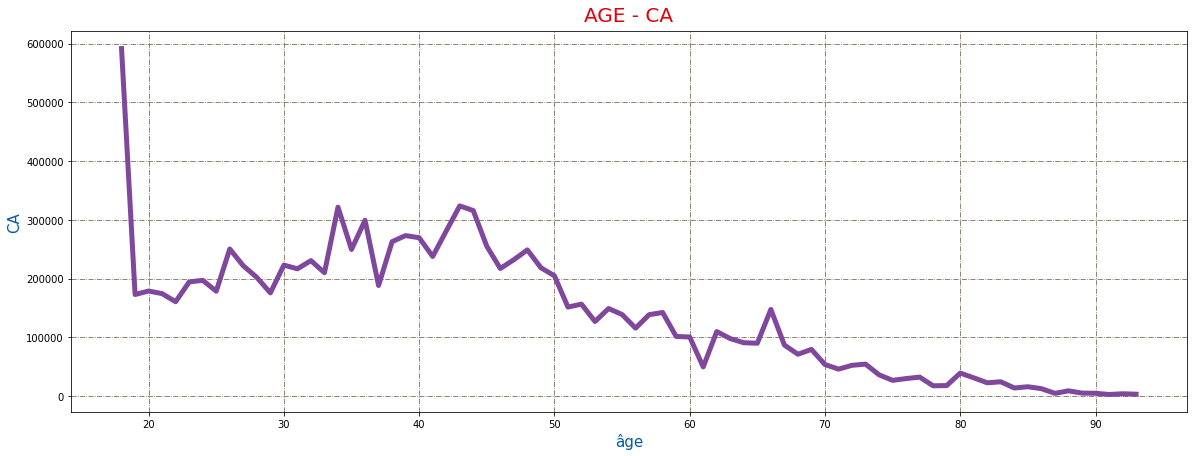

In [38]:
### ------------------------------------ Graph ---------------------------------------  ###
fig = plt.figure(figsize= (20,7))
plt.plot(age_ca['age'].values, age_ca['price'].values, c = '#80489C' , linewidth = 5)
plt.title("AGE - CA", color = '#E50007', fontsize = 20, pad = 10)
plt.xlabel("âge", color = '#0359AA', fontsize = 15)
plt.ylabel("CA", color = '#0359AA', fontsize = 15)
plt.grid(axis = 'x' , linestyle = '-.' , color = '#7A6755' )
plt.grid(axis = 'y' , linestyle = '-.' , color = '#7A6755' )
plt.savefig("4 - Export Graphs/Graphique_Julie_Test_AGE_CA.png", dpi = 100)
plt.show()

----------------------------------------
<font color='green'>

## 3 - lien entre l’âge des clients et la fréquence d’achat

In [39]:
# ---------------------------------   Nombre de panier   ------------------------------------- #
# Nombre livres achetés
nb_panier_1 = age_18_25['session_id'].count()
nb_panier_2 = age_26_35['session_id'].count()
nb_panier_3 = age_36_45['session_id'].count()
nb_panier_4 = age_46_55['session_id'].count()
nb_panier_5 = age_56_65['session_id'].count()
nb_panier_6 = age_sup_65['session_id'].count()

nb_panier_1_f = age_18_25_f['session_id'].count()
nb_panier_2_f = age_26_35_f['session_id'].count()
nb_panier_3_f = age_36_45_f['session_id'].count()
nb_panier_4_f = age_46_55_f['session_id'].count()
nb_panier_5_f = age_56_65_f['session_id'].count()
nb_panier_6_f = age_sup_65_f['session_id'].count()

nb_panier_1_m = age_18_25_m['session_id'].count()
nb_panier_2_m = age_26_35_m['session_id'].count()
nb_panier_3_m = age_36_45_m['session_id'].count()
nb_panier_4_m = age_46_55_m['session_id'].count()
nb_panier_5_m = age_56_65_m['session_id'].count()
nb_panier_6_m = age_sup_65_m['session_id'].count()

tranche = ['18-25 ans' , '26-35 ans' , '36-45 ans' , '46-55 ans' , '56-65 ans' , 'Sup à 65 ans']
nb_panier_total = [nb_panier_1 , nb_panier_2 , nb_panier_3 , nb_panier_4 , nb_panier_5 , nb_panier_6]
nb_panier_femme = [nb_panier_1_f , nb_panier_2_f , nb_panier_3_f , nb_panier_4_f , nb_panier_5_f , nb_panier_6_f]
nb_panier_homme = [nb_panier_1_m , nb_panier_2_m , nb_panier_3_m , nb_panier_4_m , nb_panier_5_m , nb_panier_6_m]
d_33 = {'Tranche': tranche, 'Nb panier total': nb_panier_total , 'Nb panier femme': nb_panier_femme, 'Nb panier homme': nb_panier_homme}
nb_panier = pd.DataFrame(data = d_33, index = range(6))

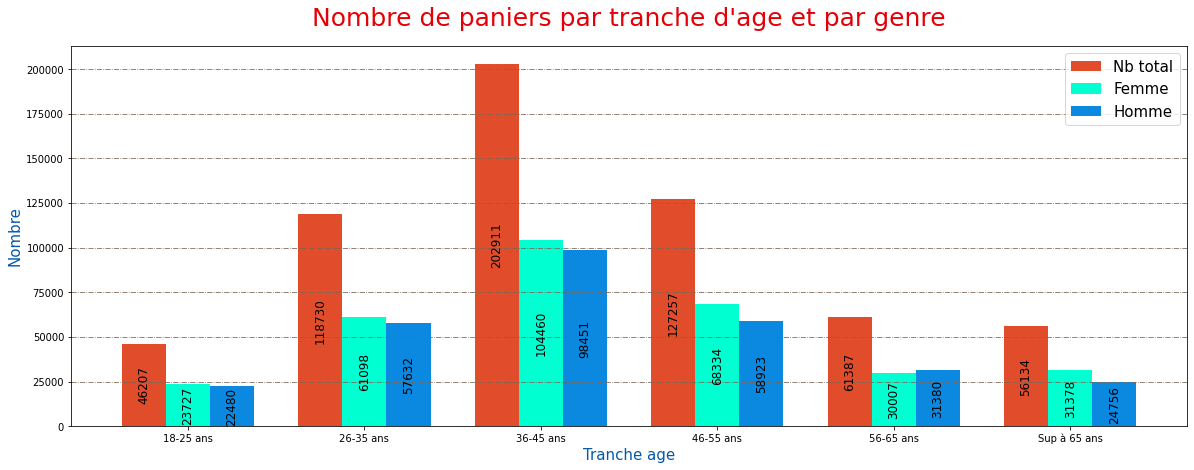

In [40]:
### ------------------------------------ Graph ---------------------------------------  ###
largeur = 0.25
x = nb_panier['Tranche']
y_1 = nb_panier['Nb panier total']
y_2 = nb_panier['Nb panier femme']
y_3 = nb_panier['Nb panier homme']
pos_x = np.arange(len(x))
fig = plt.figure(figsize= (20,7))
graph1 = plt.bar(pos_x - largeur , y_1 , width = largeur , color = '#E14D2A')
graph2 = plt.bar(pos_x , y_2 , width = largeur , color = '#00FFD1')
graph3 = plt.bar(pos_x + largeur, y_3 , width = largeur , color = '#0B89E1')
plt.title("Nombre de paniers par tranche d'age et par genre", color = '#E50007', fontsize = 25, pad = 20)
plt.xlabel('Tranche age', color = '#0359AA', fontsize = 15)
plt.ylabel("Nombre", color = '#0359AA', fontsize = 15)
plt.xticks(pos_x , x)
plt.grid(axis = 'y' , linestyle = '-.' , color = '#7A6755' )
plt.legend(labels = ['Nb total' , 'Femme', 'Homme'], fontsize = 15, loc = 'upper right')
plt.bar_label(graph1 , label_type='center' , rotation = 90 , fontsize = 12)
plt.bar_label(graph2 , label_type='center' , rotation = 90 , fontsize = 12)
plt.bar_label(graph3 , label_type='center' , rotation = 90 , fontsize = 12)
plt.savefig("4 - Export Graphs/Graphique_Julie_Nombre_paniers_tranche_age_genre.png", dpi = 100)
plt.show()

In [41]:
# ---------------------------------   fréquence d'achat  ------------------------------------- #

freq_tot_1 = age_18_25.groupby(['client_id'], as_index = False)['session_id'].nunique().mean()
freq_tot_2 = age_26_35.groupby(['client_id'], as_index = False)['session_id'].nunique().mean()
freq_tot_3 = age_36_45.groupby(['client_id'], as_index = False)['session_id'].nunique().mean()
freq_tot_4 = age_46_55.groupby(['client_id'], as_index = False)['session_id'].nunique().mean()
freq_tot_5 = age_56_65.groupby(['client_id'], as_index = False)['session_id'].nunique().mean()
freq_tot_6 = age_sup_65.groupby(['client_id'], as_index = False)['session_id'].nunique().mean()

freq_f_1 = age_18_25_f.groupby(['client_id'], as_index = False)['session_id'].nunique().mean()
freq_f_2 = age_26_35_f.groupby(['client_id'], as_index = False)['session_id'].nunique().mean()
freq_f_3 = age_36_45_f.groupby(['client_id'], as_index = False)['session_id'].nunique().mean()
freq_f_4 = age_46_55_f.groupby(['client_id'], as_index = False)['session_id'].nunique().mean()
freq_f_5 = age_56_65_f.groupby(['client_id'], as_index = False)['session_id'].nunique().mean()
freq_f_6 = age_sup_65_f.groupby(['client_id'], as_index = False)['session_id'].nunique().mean()

freq_m_1 = age_18_25_m.groupby(['client_id'], as_index = False)['session_id'].nunique().mean()
freq_m_2 = age_26_35_m.groupby(['client_id'], as_index = False)['session_id'].nunique().mean()
freq_m_3 = age_36_45_m.groupby(['client_id'], as_index = False)['session_id'].nunique().mean()
freq_m_4 = age_46_55_m.groupby(['client_id'], as_index = False)['session_id'].nunique().mean()
freq_m_5 = age_56_65_m.groupby(['client_id'], as_index = False)['session_id'].nunique().mean()
freq_m_6 = age_sup_65_m.groupby(['client_id'], as_index = False)['session_id'].nunique().mean()

tranche = ['18-25 ans' , '26-35 ans' , '36-45 ans' , '46-55 ans' , '56-65 ans' , 'Sup à 65 ans']
freq_total = [round(freq_tot_1[0],2) , round(freq_tot_2[0],2) , round(freq_tot_3[0],2) , round(freq_tot_4[0],2) , round(freq_tot_5[0],1) , round(freq_tot_6[0],2)]
freq_femme = [round(freq_f_1[0],2) , round(freq_f_2[0],2) , round(freq_f_3[0],2) , round(freq_f_4[0],2) , round(freq_f_5[0],2) , round(freq_f_6[0],2)]
freq_homme = [round(freq_m_1[0],2) , round(freq_m_2[0],2) , round(freq_m_3[0],2) , round(freq_m_4[0],2) , round(freq_m_5[0],2) , round(freq_m_6[0],2)]
d_6 = {'Tranche': tranche, 'Fréquence total': freq_total , 'Fréquence femme': freq_femme, 'Fréquence homme': freq_homme}
freq = pd.DataFrame(data = d_6, index = range(6))

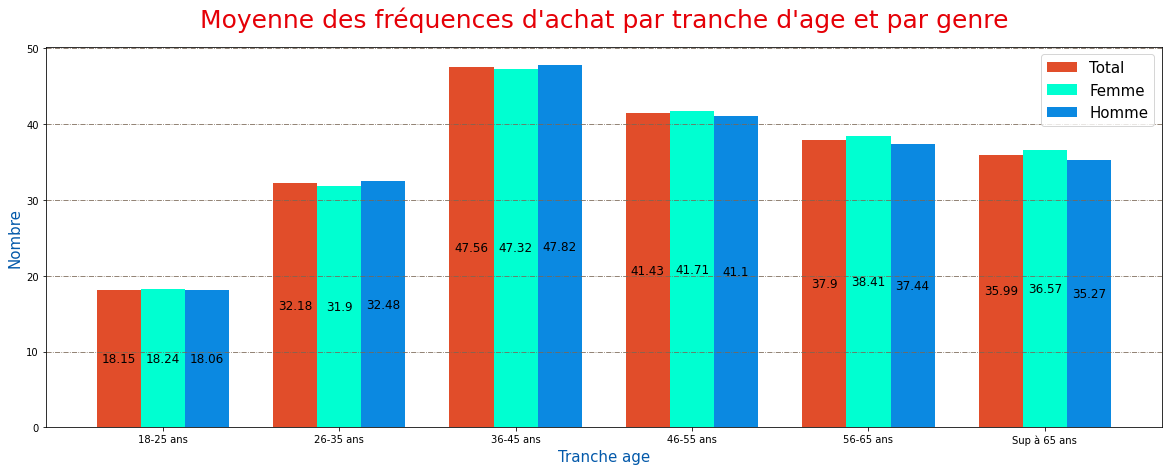

In [42]:
### ------------------------------------ Graph ---------------------------------------  ###
largeur = 0.25
x = freq['Tranche']
y_1 = freq['Fréquence total']
y_2 = freq['Fréquence femme']
y_3 = freq['Fréquence homme']
pos_x = np.arange(len(x))
fig = plt.figure(figsize= (20,7))
graph1 = plt.bar(pos_x - largeur , y_1 , width = largeur , color = '#E14D2A')
graph2 = plt.bar(pos_x , y_2 , width = largeur , color = '#00FFD1')
graph3 = plt.bar(pos_x + largeur, y_3 , width = largeur , color = '#0B89E1')
plt.title("Moyenne des fréquences d'achat par tranche d'age et par genre", color = '#E50007', fontsize = 25, pad = 20)
plt.xlabel('Tranche age', color = '#0359AA', fontsize = 15)
plt.ylabel("Nombre", color = '#0359AA', fontsize = 15)
plt.xticks(pos_x , x)
plt.grid(axis = 'y' , linestyle = '-.' , color = '#7A6755' )
plt.legend(labels = ['Total' , 'Femme', 'Homme'], fontsize = 15, loc = 'upper right')
plt.bar_label(graph1 , label_type='center' , fontsize = 12)
plt.bar_label(graph2 , label_type='center' ,fontsize = 12)
plt.bar_label(graph3 , label_type='center' , fontsize = 12)
plt.savefig("4 - Export Graphs/Graphique_Julie_Fréquence_achat_tranche_age_genre.png", dpi = 100)
plt.show()

<font color='red'>  

### Tests statistiques : Âge des clients et fréquence des achats  
 

Données d'entrées :  
    - âge : variable quantitative discrete  
    - fréquence : variable quantitative discrete  
  
 => Vérification si les variables suivent une loi normale à l'aide du test de kolmogorov-smirnov   
-------------> Si oui : Application du test de Pierson  
-------------> Si non : Application du test de Spearman
  
  


In [43]:
# Agregation df pour age avec calcul nombre de session
age_freq = base.groupby(['age'], as_index = False)['session_id'].nunique()


In [44]:
# Vérification loi normale : test de kolmogorov-smirnov à 2 échantillons
print('---------------   Test de kolmogorov-smirnov à 2 échantillons   --------------- \n')
print('Hypothèse H0 : La distribution respecte une loi normale')
alpha = 0.05
print('Définition du seuil de décision : alpha =',alpha, 'soit', round(alpha * 100),'% \n')
a,b = stats.ks_2samp(age_freq['age'] , age_freq['session_id'])
print('Résultat du test statistique de kolmogorov-Smirnov:', round(a,4))
print('    avec une p-valeur :', format(b,'.1e'))
print('\n----RESULTAT----    p-valeur < alpha  =>  l\'hypothèse H0 est rejetée')
print('Il ne s\'agit pas d\'une distribution respectant une loi normale  => Test de Spearman à effectuer (Test non paramétrique)')

---------------   Test de kolmogorov-smirnov à 2 échantillons   --------------- 

Hypothèse H0 : La distribution respecte une loi normale
Définition du seuil de décision : alpha = 0.05 soit 5 % 

Résultat du test statistique de kolmogorov-Smirnov: 0.9868
    avec une p-valeur : 8.2e-43

----RESULTAT----    p-valeur < alpha  =>  l'hypothèse H0 est rejetée
Il ne s'agit pas d'une distribution respectant une loi normale  => Test de Spearman à effectuer (Test non paramétrique)


In [45]:
# Test de Spearman
print('---------------   Test de SPEARMAN (non-paramétrique) : corrélation variables   --------------- \n')
print('Hypothèse H0: Pas de corrélation entre les deux variables')
alpha = 0.05
print('Définition du seuil de décision : alpha =',alpha, 'soit', round(alpha * 100),'% \n')
c,d = stats.spearmanr(age_freq['age'] , age_freq['session_id'])
print('Résultat du test statistique de Spearman :', round(c,2))
print('    avec une p-valeur :', format(d,'.1e'))
print('\n----RESULTAT----    p-valeur < alpha  =>  l\'hypothèse H0 est rejetée')
print('Nous pouvons affirmer à 95% qu\'il y a une dépendance entre l\'âge et la fréquence des achats')
print('\nLe coefficient de corrélation est compris entre -1 (forte corrélation négative) et 1 (forte corrélation positive) avec 0 (pas de corrélation)')
print('    => Ici nous sommes proche d\'une forte correlation négative : Tendance vers une fonction monotone décroissante \n')
print('Nous pouvons le visualiser sur le graphique ci-dessous :')

---------------   Test de SPEARMAN (non-paramétrique) : corrélation variables   --------------- 

Hypothèse H0: Pas de corrélation entre les deux variables
Définition du seuil de décision : alpha = 0.05 soit 5 % 

Résultat du test statistique de Spearman : -0.66
    avec une p-valeur : 9.8e-11

----RESULTAT----    p-valeur < alpha  =>  l'hypothèse H0 est rejetée
Nous pouvons affirmer à 95% qu'il y a une dépendance entre l'âge et la fréquence des achats

Le coefficient de corrélation est compris entre -1 (forte corrélation négative) et 1 (forte corrélation positive) avec 0 (pas de corrélation)
    => Ici nous sommes proche d'une forte correlation négative : Tendance vers une fonction monotone décroissante 

Nous pouvons le visualiser sur le graphique ci-dessous :


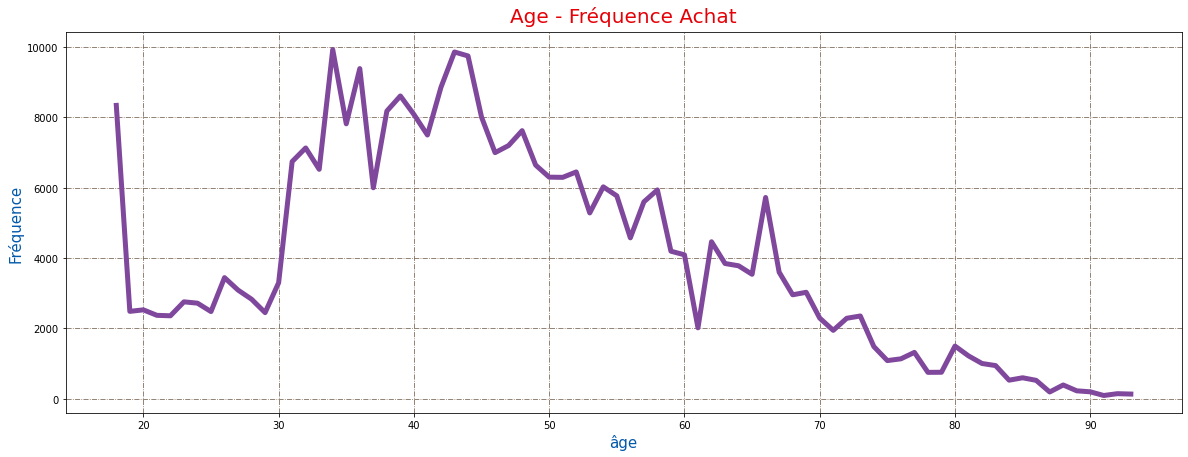

In [46]:
### ------------------------------------ Graph ---------------------------------------  ###
fig = plt.figure(figsize= (20,7))
plt.plot(age_freq['age'] , age_freq['session_id'], c = '#80489C' , linewidth = 5)
plt.title("Age - Fréquence Achat", color = '#E50007', fontsize = 20, pad = 10)
plt.xlabel("âge", color = '#0359AA', fontsize = 15)
plt.ylabel("Fréquence", color = '#0359AA', fontsize = 15)
plt.grid(axis = 'x' , linestyle = '-.' , color = '#7A6755' )
plt.grid(axis = 'y' , linestyle = '-.' , color = '#7A6755' )
plt.savefig("4 - Export Graphs/Graphique_Julie_Test_Age_Fréquence.png", dpi = 100)
plt.show()

----------------------------------------
<font color='green'>

## 4 - lien entre l’âge des clients et la taille du panier moyen

In [47]:
# ---------------------------------   Nombre d'achat   ------------------------------------- #

# Nombre livres achetés
nb_livre_1 = age_18_25['id_prod'].count()
nb_livre_2 = age_26_35['id_prod'].count()
nb_livre_3 = age_36_45['id_prod'].count()
nb_livre_4 = age_46_55['id_prod'].count()
nb_livre_5 = age_56_65['id_prod'].count()
nb_livre_6 = age_sup_65['id_prod'].count()

nb_livre_1_f = age_18_25_f['id_prod'].count()
nb_livre_2_f = age_26_35_f['id_prod'].count()
nb_livre_3_f = age_36_45_f['id_prod'].count()
nb_livre_4_f = age_46_55_f['id_prod'].count()
nb_livre_5_f = age_56_65_f['id_prod'].count()
nb_livre_6_f = age_sup_65_f['id_prod'].count()

nb_livre_1_m = age_18_25_m['id_prod'].count()
nb_livre_2_m = age_26_35_m['id_prod'].count()
nb_livre_3_m = age_36_45_m['id_prod'].count()
nb_livre_4_m = age_46_55_m['id_prod'].count()
nb_livre_5_m = age_56_65_m['id_prod'].count()
nb_livre_6_m = age_sup_65_m['id_prod'].count()

tranche = ['18-25 ans' , '26-35 ans' , '36-45 ans' , '46-55 ans' , '56-65 ans' , 'Sup à 65 ans']
nb_livre_total = [nb_livre_1 , nb_livre_2 , nb_livre_3 , nb_livre_4 , nb_livre_5 , nb_livre_6]
nb_livre_femme = [nb_livre_1_f , nb_livre_2_f , nb_livre_3_f , nb_livre_4_f , nb_livre_5_f , nb_livre_6_f]
nb_livre_homme = [nb_livre_1_m , nb_livre_2_m , nb_livre_3_m , nb_livre_4_m , nb_livre_5_m , nb_livre_6_m]
d_3 = {'Tranche': tranche, 'Nb livre total': nb_livre_total , 'Nb livre femme': nb_livre_femme, 'Nb livre homme': nb_livre_homme}
nb_livre = pd.DataFrame(data = d_3, index = range(6))

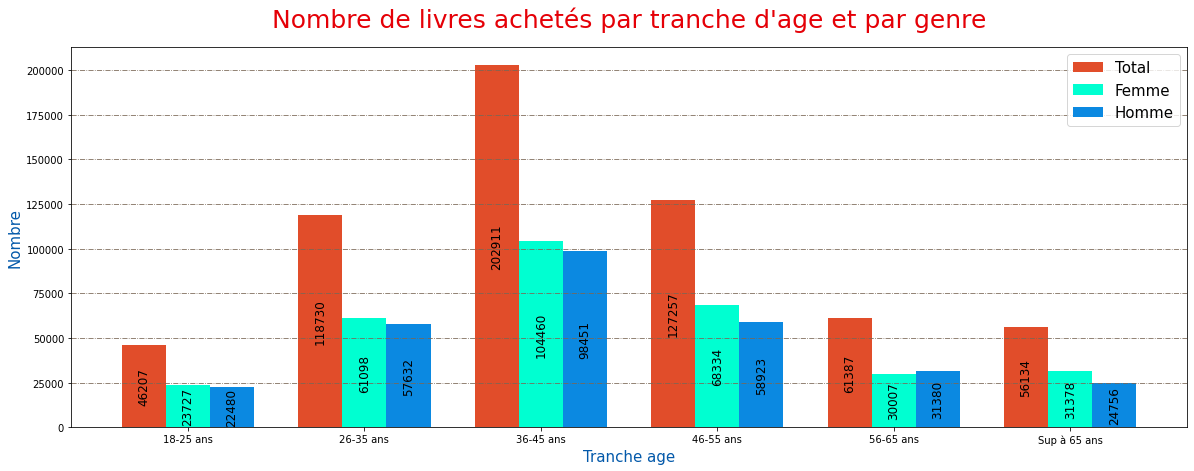

In [48]:
### ------------------------------------ Graph ---------------------------------------  ###
largeur = 0.25
x = nb_livre['Tranche']
y_1 = nb_livre['Nb livre total']
y_2 = nb_livre['Nb livre femme']
y_3 = nb_livre['Nb livre homme']
pos_x = np.arange(len(x))
fig = plt.figure(figsize= (20,7))
graph1 = plt.bar(pos_x - largeur , y_1 , width = largeur , color = '#E14D2A')
graph2 = plt.bar(pos_x , y_2 , width = largeur , color = '#00FFD1')
graph3 = plt.bar(pos_x + largeur, y_3 , width = largeur , color = '#0B89E1')
plt.title("Nombre de livres achetés par tranche d'age et par genre", color = '#E50007', fontsize = 25, pad = 20)
plt.xlabel('Tranche age', color = '#0359AA', fontsize = 15)
plt.ylabel("Nombre", color = '#0359AA', fontsize = 15)
plt.xticks(pos_x , x)
plt.grid(axis = 'y' , linestyle = '-.' , color = '#7A6755' )
plt.legend(labels = ['Total' , 'Femme', 'Homme'], fontsize = 15, loc = 'upper right')
plt.bar_label(graph1 , label_type='center' , rotation = 90 , fontsize = 12)
plt.bar_label(graph2 , label_type='center' , rotation = 90 , fontsize = 12)
plt.bar_label(graph3 , label_type='center' , rotation = 90 , fontsize = 12)
plt.savefig("4 - Export Graphs/Graphique_Julie_Nombre_livres_tranche_age_genre.png", dpi = 100)
plt.show()

In [49]:
# ---------------------------------   Panier moyen   ------------------------------------- #

# Valeurs moyen du panier par tranche d'age
panier_1 = age_18_25.groupby('session_id' , as_index = False)['price'].sum()
panier_2 = age_26_35.groupby('session_id' , as_index = False)['price'].sum()
panier_3 = age_36_45.groupby('session_id' , as_index = False)['price'].sum()
panier_4 = age_46_55.groupby('session_id' , as_index = False)['price'].sum()
panier_5 = age_56_65.groupby('session_id' , as_index = False)['price'].sum()
panier_6 = age_sup_65.groupby('session_id' , as_index = False)['price'].sum()

#  Valeurs moyen du panier par tranche d'age pour une femme
panier_1_f = age_18_25_f.groupby('session_id' , as_index = False)['price'].sum()
panier_2_f = age_26_35_f.groupby('session_id' , as_index = False)['price'].sum()
panier_3_f = age_36_45_f.groupby('session_id' , as_index = False)['price'].sum()
panier_4_f = age_46_55_f.groupby('session_id' , as_index = False)['price'].sum()
panier_5_f = age_56_65_f.groupby('session_id' , as_index = False)['price'].sum()
panier_6_f = age_sup_65_f.groupby('session_id' , as_index = False)['price'].sum()

#  Valeurs moyen du panier par tranche d'age pour un homme
panier_1_m = age_18_25_m.groupby('session_id' , as_index = False)['price'].sum()
panier_2_m = age_26_35_m.groupby('session_id' , as_index = False)['price'].sum()
panier_3_m = age_36_45_m.groupby('session_id' , as_index = False)['price'].sum()
panier_4_m = age_46_55_m.groupby('session_id' , as_index = False)['price'].sum()
panier_5_m = age_56_65_m.groupby('session_id' , as_index = False)['price'].sum()
panier_6_m = age_sup_65_m.groupby('session_id' , as_index = False)['price'].sum()

tranche = ['18-25 ans' , '26-35 ans' , '36-45 ans' , '46-55 ans' , '56-65 ans' , 'Sup à 65 ans']
panier_total = [round(panier_1['price'].mean(),2)   , round(panier_2['price'].mean(),2)   , round(panier_3['price'].mean(),2) ,
                round(panier_4['price'].mean(),2)   , round(panier_5['price'].mean(),2)   , round(panier_6['price'].mean(),2) ]
panier_femme = [round(panier_1_f['price'].mean(),2) , round(panier_2_f['price'].mean(),2) , round(panier_3_f['price'].mean(),2) ,
                round(panier_4_f['price'].mean(),2) , round(panier_5_f['price'].mean(),2) , round(panier_6_f['price'].mean(),2) ]
panier_homme = [round(panier_1_m['price'].mean(),2) , round(panier_2_m['price'].mean(),2) , round(panier_3_m['price'].mean(),2) ,
                round(panier_4_m['price'].mean(),2) , round(panier_5_m['price'].mean(),2) , round(panier_6_m['price'].mean(),2) ]
d_2 = {'Tranche': tranche, 'panier total': panier_total , 'panier femme': panier_femme, 'panier homme': panier_homme}
panier_moyen = pd.DataFrame(data = d_2, index = range(6))

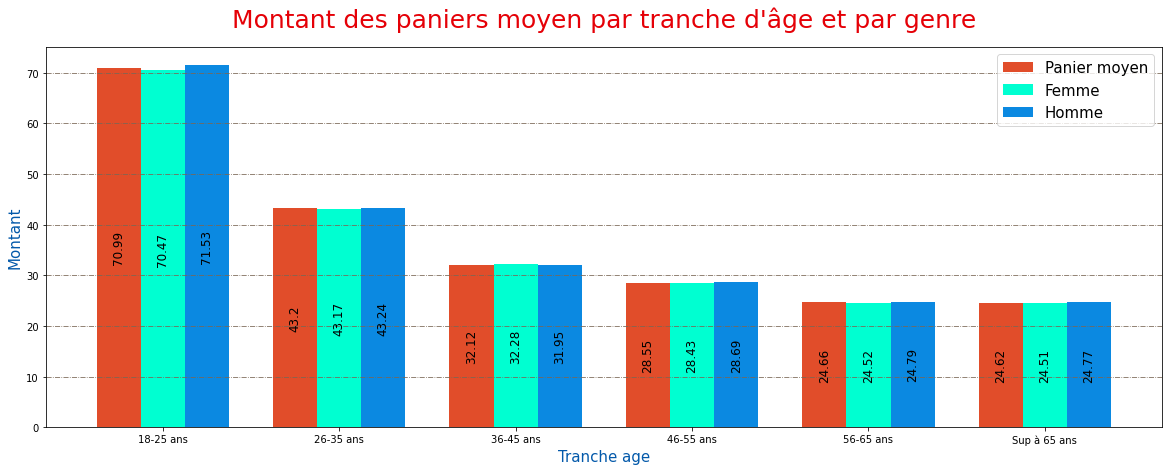

In [50]:
### ------------------------------------ Graph ---------------------------------------  ###
largeur = 0.25
x = panier_moyen['Tranche']
y_1 = panier_moyen['panier total']
y_2 = panier_moyen['panier femme']
y_3 = panier_moyen['panier homme']
pos_x = np.arange(len(x))
fig = plt.figure(figsize= (20,7))
graph1 = plt.bar(pos_x - largeur , y_1 , width = largeur , color = '#E14D2A')
graph2 = plt.bar(pos_x , y_2 , width = largeur , color = '#00FFD1')
graph3 = plt.bar(pos_x + largeur, y_3 , width = largeur , color = '#0B89E1')
plt.title("Montant des paniers moyen par tranche d'âge et par genre", color = '#E50007', fontsize = 25, pad = 20)
plt.xlabel('Tranche age', color = '#0359AA', fontsize = 15)
plt.ylabel("Montant", color = '#0359AA', fontsize = 15)
plt.xticks(pos_x , x)
plt.grid(axis = 'y' , linestyle = '-.' , color = '#7A6755' )
plt.legend(labels = ['Panier moyen' , 'Femme', 'Homme'], fontsize = 15, loc = 'upper right')
plt.bar_label(graph1 , label_type='center' , rotation = 90 , fontsize = 12)
plt.bar_label(graph2 , label_type='center' , rotation = 90 , fontsize = 12)
plt.bar_label(graph3 , label_type='center' , rotation = 90 , fontsize = 12)
plt.savefig("4 - Export Graphs/Graphique_Julie_Montant_paniers_moyen_tranche_age_genre.png", dpi = 100)
plt.show()

<font color='red'>  

### Tests statistiques : Âge des clients et Montant du Panier Moyen  
 

Données d'entrées :  
    - âge : variable quantitative discrete  
    - Montant du Panier : variable quantitative discrete  
  

=> Vérification si les variables suivent une loi normale à l'aide du test de kolmogorov-smirnov   
-------------> Si oui : Application du test de Pierson  
-------------> Si non : Application du test de Spearman

In [51]:
# Agregation df pour age avec calcul panier
age_panier = base.groupby(['age'], as_index = False).agg(nb_panier = ('session_id', 'nunique'), somme_panier = ('price', 'sum'))
age_panier['moy_panier'] = age_panier['somme_panier'] / age_panier['nb_panier']

In [52]:
# Vérification loi normale : test de kolmogorov-smirnov à 2 échantillons
print('---------------   Test de kolmogorov-smirnov à 2 échantillons   --------------- \n')
print('Hypothèse H0 : La distribution respecte une loi normale')
alpha = 0.05
print('Définition du seuil de décision : alpha =',alpha, 'soit', round(alpha * 100),'% \n')
a,b = stats.ks_2samp(age_panier['age'] , age_panier['moy_panier'])
print('Résultat du test statistique de kolmogorov-Smirnov:', round(a,2))
print('    avec une p-valeur :', format(b,'.1e'))
print('\n----RESULTAT----    p-valeur < alpha  =>  l\'hypothèse H0 est rejeté')
print('Il ne s\'agit pas d\'une distribution respectant une loi normale  => Test de Spearman à effectuer (Test non paramétrique) \n \n')

---------------   Test de kolmogorov-smirnov à 2 échantillons   --------------- 

Hypothèse H0 : La distribution respecte une loi normale
Définition du seuil de décision : alpha = 0.05 soit 5 % 

Résultat du test statistique de kolmogorov-Smirnov: 0.62
    avec une p-valeur : 6.6e-14

----RESULTAT----    p-valeur < alpha  =>  l'hypothèse H0 est rejeté
Il ne s'agit pas d'une distribution respectant une loi normale  => Test de Spearman à effectuer (Test non paramétrique) 
 



In [53]:
# Test de Spearman
print('---------------   Test de SPEARMAN (non-paramétrique) : corrélation variables   --------------- \n')
print('Hypothèse H0: Pas de corrélation entre les deux variables')
alpha = 0.05
print('Définition du seuil de décision : alpha =',alpha, 'soit', round(alpha * 100),'% \n')
c,d = stats.spearmanr(age_panier['age'] , age_panier['moy_panier'])
print('Résultat du test statistique de Spearman :', round(c,2))
print('    avec une p-valeur :', format(d,'.1e'))
print('\n----RESULTAT----    p-valeur < alpha  =>  l\'hypothèse H0 est rejetée')
print('Nous pouvons affirmer à 95% qu\'il y a une dépendance entre l\'âge et le montant du panier moyen')
print('\nLe coefficient de corrélation est compris entre -1 (forte corrélation négative) et 1 (forte corrélation positive) avec 0 (pas de corrélation)')
print('    => Ici nous sommes proche d\'une forte correlation négative : Tendance vers une fonction monotone décroissante \n')
print('Nous pouvons le visualiser sur le graphique ci-dessous :')

---------------   Test de SPEARMAN (non-paramétrique) : corrélation variables   --------------- 

Hypothèse H0: Pas de corrélation entre les deux variables
Définition du seuil de décision : alpha = 0.05 soit 5 % 

Résultat du test statistique de Spearman : -0.77
    avec une p-valeur : 3.7e-16

----RESULTAT----    p-valeur < alpha  =>  l'hypothèse H0 est rejetée
Nous pouvons affirmer à 95% qu'il y a une dépendance entre l'âge et le montant du panier moyen

Le coefficient de corrélation est compris entre -1 (forte corrélation négative) et 1 (forte corrélation positive) avec 0 (pas de corrélation)
    => Ici nous sommes proche d'une forte correlation négative : Tendance vers une fonction monotone décroissante 

Nous pouvons le visualiser sur le graphique ci-dessous :


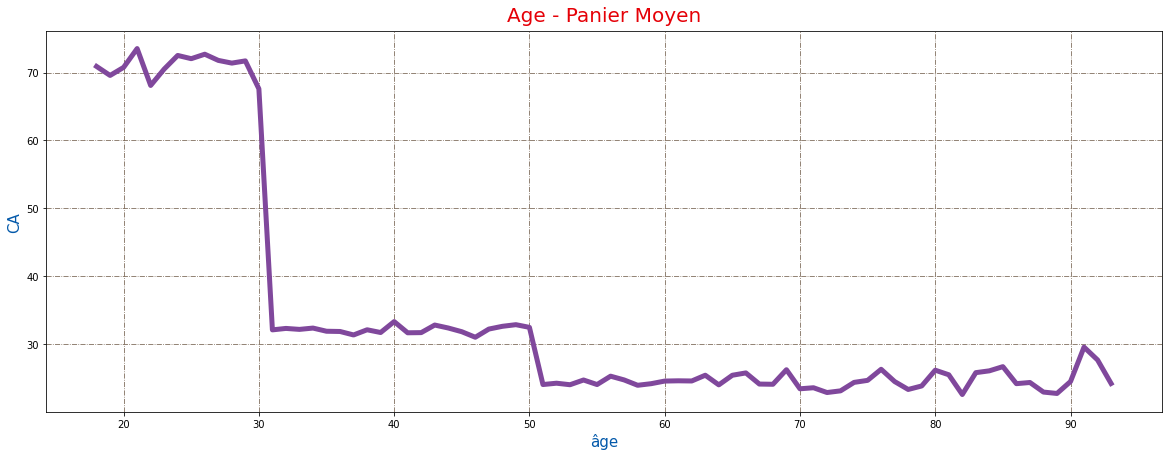

In [54]:
### ------------------------------------ Graph ---------------------------------------  ###
fig = plt.figure(figsize= (20,7))
plt.plot(age_panier['age'], age_panier['moy_panier'], c = '#80489C' , linewidth = 5)
plt.title("Age - Panier Moyen", color = '#E50007', fontsize = 20, pad = 10)
plt.xlabel("âge", color = '#0359AA', fontsize = 15)
plt.ylabel("CA", color = '#0359AA', fontsize = 15)
plt.grid(axis = 'x' , linestyle = '-.' , color = '#7A6755' )
plt.grid(axis = 'y' , linestyle = '-.' , color = '#7A6755' )
plt.savefig("4 - Export Graphs/Graphique_Julie_Test_Age_Panier_Moyen.png", dpi = 100)
plt.show()

----------------------------------------
<font color='green'>

## 5 - lien entre l’âge des clients et les catégories des livres achetés

In [55]:
# ---------------------------------   CA par catégorie et par tranche d'âge   ------------------------------------- #

# CA par tranche par categ
tranche_1_ca_categ_0 = base.loc[(base['categ'] == 0) & (base['age'] <= 25),:]['price'].sum()
tranche_1_ca_categ_1 = base.loc[(base['categ'] == 1) & (base['age'] <= 25),:]['price'].sum()
tranche_1_ca_categ_2 = base.loc[(base['categ'] == 2) & (base['age'] <= 25),:]['price'].sum()

tranche_2_ca_categ_0 = base.loc[(base['categ'] == 0) & (base['age'] > 25) & (base['age'] <= 35),:]['price'].sum()
tranche_2_ca_categ_1 = base.loc[(base['categ'] == 1) & (base['age'] > 25) & (base['age'] <= 35),:]['price'].sum()
tranche_2_ca_categ_2 = base.loc[(base['categ'] == 2) & (base['age'] > 25) & (base['age'] <= 35),:]['price'].sum()

tranche_3_ca_categ_0 = base.loc[(base['categ'] == 0) & (base['age'] > 35) & (base['age'] <= 45),:]['price'].sum()
tranche_3_ca_categ_1 = base.loc[(base['categ'] == 1) & (base['age'] > 35) & (base['age'] <= 45),:]['price'].sum()
tranche_3_ca_categ_2 = base.loc[(base['categ'] == 2) & (base['age'] > 35) & (base['age'] <= 45),:]['price'].sum()

tranche_4_ca_categ_0 = base.loc[(base['categ'] == 0) & (base['age'] > 45) & (base['age'] <= 55),:]['price'].sum()
tranche_4_ca_categ_1 = base.loc[(base['categ'] == 1) & (base['age'] > 45) & (base['age'] <= 55),:]['price'].sum()
tranche_4_ca_categ_2 = base.loc[(base['categ'] == 2) & (base['age'] > 45) & (base['age'] <= 55),:]['price'].sum()

tranche_5_ca_categ_0 = base.loc[(base['categ'] == 0) & (base['age'] > 55) & (base['age'] <= 65),:]['price'].sum()
tranche_5_ca_categ_1 = base.loc[(base['categ'] == 1) & (base['age'] > 55) & (base['age'] <= 65),:]['price'].sum()
tranche_5_ca_categ_2 = base.loc[(base['categ'] == 2) & (base['age'] > 55) & (base['age'] <= 65),:]['price'].sum()

tranche_6_ca_categ_0 = base.loc[(base['categ'] == 0) & (base['age'] > 65),:]['price'].sum()
tranche_6_ca_categ_1 = base.loc[(base['categ'] == 1) & (base['age'] > 65),:]['price'].sum()
tranche_6_ca_categ_2 = base.loc[(base['categ'] == 2) & (base['age'] > 65),:]['price'].sum()

tranche = ['18-25 ans' , '26-35 ans' , '36-45 ans' , '46-55 ans' , '56-65 ans' , 'Sup à 65 ans']
ca_categ_0 = [tranche_1_ca_categ_0 , tranche_2_ca_categ_0 , tranche_3_ca_categ_0 , tranche_4_ca_categ_0 , tranche_5_ca_categ_0 , tranche_6_ca_categ_0]
ca_categ_1 = [tranche_1_ca_categ_1 , tranche_2_ca_categ_1 , tranche_3_ca_categ_1 , tranche_4_ca_categ_1 , tranche_5_ca_categ_1 , tranche_6_ca_categ_1]
ca_categ_2 = [tranche_1_ca_categ_2 , tranche_2_ca_categ_2 , tranche_3_ca_categ_2 , tranche_4_ca_categ_2 , tranche_5_ca_categ_2 , tranche_6_ca_categ_2]
d_5 = {'Tranche': tranche, 'Catégorie 0': ca_categ_0 , 'Catégorie 1': ca_categ_1, 'Catégorie 2': ca_categ_2}
ca_categ = pd.DataFrame(data = d_5, index = range(6))

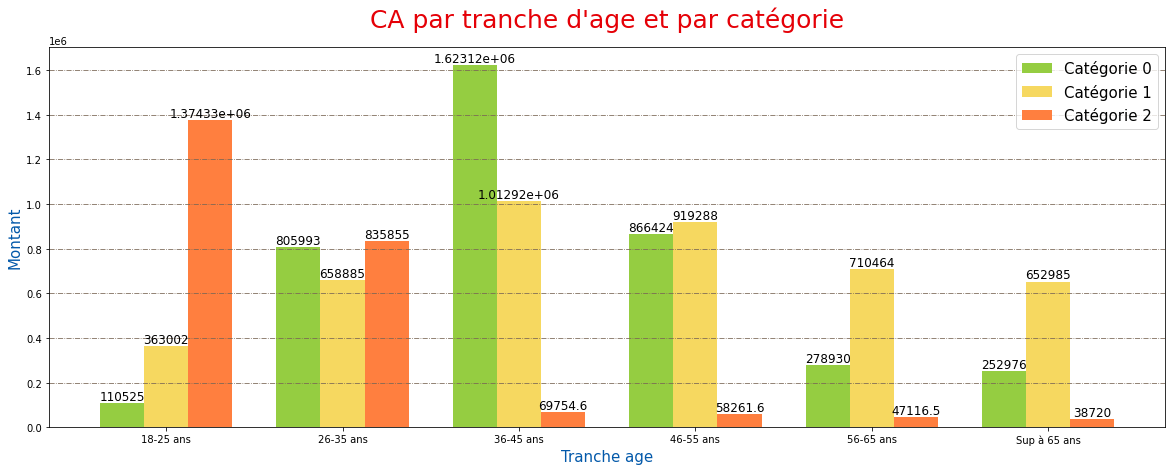

In [56]:
### ------------------------------------ Graph ---------------------------------------  ###

largeur = 0.25
x = ca_categ['Tranche']
y_1 = ca_categ['Catégorie 0']
y_2 = ca_categ['Catégorie 1']
y_3 = ca_categ['Catégorie 2']
pos_x = np.arange(len(x))
fig = plt.figure(figsize= (20,7))
graph1 = plt.bar(pos_x - largeur , y_1 , width = largeur , color = '#95CD41')
graph2 = plt.bar(pos_x , y_2 , width = largeur , color = '#F6D860')
graph3 = plt.bar(pos_x + largeur, y_3 , width = largeur , color = '#FF7F3F')
plt.title("CA par tranche d'age et par catégorie", color = '#E50007', fontsize = 25, pad = 20)
plt.xlabel('Tranche age', color = '#0359AA', fontsize = 15)
plt.ylabel("Montant", color = '#0359AA', fontsize = 15)
plt.xticks(pos_x , x)
plt.grid(axis = 'y' , linestyle = '-.' , color = '#7A6755' )
plt.legend(labels = ['Catégorie 0' , 'Catégorie 1', 'Catégorie 2'], fontsize = 15, loc = 'upper right')
plt.bar_label(graph1 , fontsize = 12)
plt.bar_label(graph2 , fontsize = 12)
plt.bar_label(graph3 , fontsize = 12)
plt.savefig("4 - Export Graphs/Graphique_Julie_CA_tranche_age_catégorie.png", dpi = 100)
plt.show()

In [57]:
# Agregation df pour age avec catégorie
age_categ = base.groupby(['age','categ'], as_index = False).agg(nb = ('categ', 'count'), ca = ('price', 'sum'))
age_categ_0 = age_categ.loc[age_categ['categ'] == 0,:]
age_categ_1 = age_categ.loc[age_categ['categ'] == 1,:]
age_categ_2 = age_categ.loc[age_categ['categ'] == 2,:]

In [58]:
# ---------------------------------   Nombre d'achat par catégorie et par tranche d'âge   ------------------------------------- #

# nb livre par tranche par categ
tranche_1_nb_categ_0 = base.loc[(base['categ'] == 0) & (base['age'] <= 25),:]['id_prod'].count()
tranche_1_nb_categ_1 = base.loc[(base['categ'] == 1) & (base['age'] <= 25),:]['id_prod'].count()
tranche_1_nb_categ_2 = base.loc[(base['categ'] == 2) & (base['age'] <= 25),:]['id_prod'].count()

tranche_2_nb_categ_0 = base.loc[(base['categ'] == 0) & (base['age'] > 25) & (base['age'] <= 35),:]['id_prod'].count()
tranche_2_nb_categ_1 = base.loc[(base['categ'] == 1) & (base['age'] > 25) & (base['age'] <= 35),:]['id_prod'].count()
tranche_2_nb_categ_2 = base.loc[(base['categ'] == 2) & (base['age'] > 25) & (base['age'] <= 35),:]['id_prod'].count()

tranche_3_nb_categ_0 = base.loc[(base['categ'] == 0) & (base['age'] > 35) & (base['age'] <= 45),:]['id_prod'].count()
tranche_3_nb_categ_1 = base.loc[(base['categ'] == 1) & (base['age'] > 35) & (base['age'] <= 45),:]['id_prod'].count()
tranche_3_nb_categ_2 = base.loc[(base['categ'] == 2) & (base['age'] > 35) & (base['age'] <= 45),:]['id_prod'].count()

tranche_4_nb_categ_0 = base.loc[(base['categ'] == 0) & (base['age'] > 45) & (base['age'] <= 55),:]['id_prod'].count()
tranche_4_nb_categ_1 = base.loc[(base['categ'] == 1) & (base['age'] > 45) & (base['age'] <= 55),:]['id_prod'].count()
tranche_4_nb_categ_2 = base.loc[(base['categ'] == 2) & (base['age'] > 45) & (base['age'] <= 55),:]['id_prod'].count()

tranche_5_nb_categ_0 = base.loc[(base['categ'] == 0) & (base['age'] > 55) & (base['age'] <= 65),:]['id_prod'].count()
tranche_5_nb_categ_1 = base.loc[(base['categ'] == 1) & (base['age'] > 55) & (base['age'] <= 65),:]['id_prod'].count()
tranche_5_nb_categ_2 = base.loc[(base['categ'] == 2) & (base['age'] > 55) & (base['age'] <= 65),:]['id_prod'].count()

tranche_6_nb_categ_0 = base.loc[(base['categ'] == 0) & (base['age'] > 65),:]['id_prod'].count()
tranche_6_nb_categ_1 = base.loc[(base['categ'] == 1) & (base['age'] > 65),:]['id_prod'].count()
tranche_6_nb_categ_2 = base.loc[(base['categ'] == 2) & (base['age'] > 65),:]['id_prod'].count()

tranche = ['18-25 ans' , '26-35 ans' , '36-45 ans' , '46-55 ans' , '56-65 ans' , 'Sup à 65 ans']
nb_categ_0 = [tranche_1_nb_categ_0 , tranche_2_nb_categ_0 , tranche_3_nb_categ_0 , tranche_4_nb_categ_0 , tranche_5_nb_categ_0 , tranche_6_nb_categ_0]
nb_categ_1 = [tranche_1_nb_categ_1 , tranche_2_nb_categ_1 , tranche_3_nb_categ_1 , tranche_4_nb_categ_1 , tranche_5_nb_categ_1 , tranche_6_nb_categ_1]
nb_categ_2 = [tranche_1_nb_categ_2 , tranche_2_nb_categ_2 , tranche_3_nb_categ_2 , tranche_4_nb_categ_2 , tranche_5_nb_categ_2 , tranche_6_nb_categ_2]
d_4 = {'Tranche': tranche, 'Catégorie 0': nb_categ_0 , 'Catégorie 1': nb_categ_1, 'Catégorie 2': nb_categ_2}
nb_categ = pd.DataFrame(data = d_4, index = range(6))

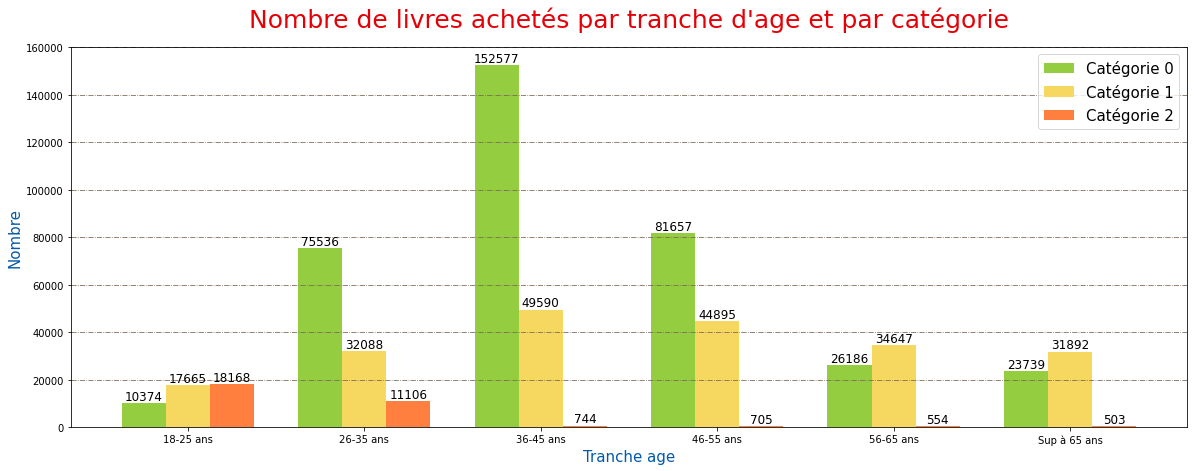

In [59]:
### ------------------------------------ Graph ---------------------------------------  ###
largeur = 0.25
x = nb_categ['Tranche']
y_1 = nb_categ['Catégorie 0']
y_2 = nb_categ['Catégorie 1']
y_3 = nb_categ['Catégorie 2']
pos_x = np.arange(len(x))
fig = plt.figure(figsize= (20,7))
graph1 = plt.bar(pos_x - largeur , y_1 , width = largeur , color = '#95CD41')
graph2 = plt.bar(pos_x , y_2 , width = largeur , color = '#F6D860')
graph3 = plt.bar(pos_x + largeur, y_3 , width = largeur , color = '#FF7F3F')
plt.title("Nombre de livres achetés par tranche d'age et par catégorie", color = '#E50007', fontsize = 25, pad = 20)
plt.xlabel('Tranche age', color = '#0359AA', fontsize = 15)
plt.ylabel("Nombre", color = '#0359AA', fontsize = 15)
plt.xticks(pos_x , x)
plt.grid(axis = 'y' , linestyle = '-.' , color = '#7A6755' )
plt.legend(labels = ['Catégorie 0' , 'Catégorie 1', 'Catégorie 2'], fontsize = 15, loc = 'upper right')
plt.bar_label(graph1 , fontsize = 12)
plt.bar_label(graph2 , fontsize = 12)
plt.bar_label(graph3 , fontsize = 12)
plt.savefig("4 - Export Graphs/Graphique_Julie_Nombre_Livres_tranche_age_catégorie.png", dpi = 100)
plt.show()

<font color='red'>  

### Tests statistiques N°1 : Âge des clients  
 

Données d'entrées :  
    - âge : variable quantitative discrete  
  

=> Vérification si la variable AGE est normalement distribuée à l'aide du test de kolmogorov-smirnov à 1 échantillon  


In [60]:
# Vérification loi normale : test de kolmogorov-smirnov à 1 échantillon
print('---------------   Test de kolmogorov-smirnov à 1 échantillon   --------------- \n')
print('Hypothèse H0 : La distribution de Age respecte une loi normale')
alpha = 0.05
print('Définition du seuil de décision : alpha =',alpha, 'soit', round(alpha * 100),'% \n')
a = stats.kstest(base['age'], 'norm')
print('Résultat du test statistique de kolmogorov-Smirnov:', a[0])
print('    avec une p-valeur :', a[1])
print('\n----RESULTAT----    p-valeur < alpha  =>  l\'hypothèse H0 est rejeté')
print('La distribution AGE ne respecte pas une loi normale')

---------------   Test de kolmogorov-smirnov à 1 échantillon   --------------- 

Hypothèse H0 : La distribution de Age respecte une loi normale
Définition du seuil de décision : alpha = 0.05 soit 5 % 

Résultat du test statistique de kolmogorov-Smirnov: 1.0
    avec une p-valeur : 0.0

----RESULTAT----    p-valeur < alpha  =>  l'hypothèse H0 est rejeté
La distribution AGE ne respecte pas une loi normale


<font color='red'>  

### Tests statistiques N°2 : Âge des clients et catégorie de produits achetés  

    

Données d'entrées :  
    - âge : variable quantitative discrete  
    - Catégorie livre (0, 1 ou 2) : variable qualitative nominale  
  

=> Vérification de l'égalité des variances dans chaque catégorie   (Test de Levene)   
-------------> Si oui : Application du test d'ANOVA  
-------------> Si non : Application du test de kruskall-wallis (non paramétrique)

In [61]:
# Agregation df pour age avec catégorie
age_categ = base.groupby(['age','categ'], as_index = False).agg(nb = ('categ', 'count'), ca = ('price', 'sum'))
age_categ_0 = age_categ.loc[age_categ['categ'] == 0,:]
age_categ_1 = age_categ.loc[age_categ['categ'] == 1,:]
age_categ_2 = age_categ.loc[age_categ['categ'] == 2,:]

In [83]:
# Test de Levene
print('\n---------------   Test de LEVENE : évaluation égalité des variances   --------------- \n')
print('Hypothèse H0 : les variances sont égales')
alpha = 0.05
print('Définition du seuil de décision : alpha =',alpha, 'soit', round(alpha * 100),'% \n')
a,b = stats.levene(age_categ_0['ca'] , age_categ_1['ca'] , age_categ_2['ca'])
print('Résultat du test statistique de Levene :', round(a,2))
print('    avec une p-valeur :', round(b,2))
print('\n----RESULTAT----    p-valeur > alpha  =>  l\'hypothèse H0 est conservée')
print('Nous pouvons affirmer à 95% que les 3 catégories ont des variances égales (CA par catégorie / âge) \n \n')


---------------   Test de LEVENE : évaluation égalité des variances   --------------- 

Hypothèse H0 : les variances sont égales
Définition du seuil de décision : alpha = 0.05 soit 5 % 

Résultat du test statistique de Levene : 1.47
    avec une p-valeur : 0.23

----RESULTAT----    p-valeur > alpha  =>  l'hypothèse H0 est conservée
Nous pouvons affirmer à 95% que les 3 catégories ont des variances égales (CA par catégorie / âge) 
 



In [84]:
# Validité du Test d'ANOVA
print('\nPour effectuer un test d\'ANOVA, il est nécessaire de valider les 3 conditions ci-dessous :')
print('   - Les échantillons comparés sont indépendants')
print('           => OUI : 3 catégories de livres distinct : 0, 1 ou 2')
print('   - Homoscédasticité : Les populations comparées ont même variance')
print('           => OUI : Test de LEVENE effectué ci-dessus')
print('   - La variable quantitative étudiée suit une loi normale')
print('           => NON : Test de kolmogorov-smirnov à 1 échantillon sur AGE non concluant \n')
print('Nous devons ainsi appliquer le test de kruskall-wallis (non paramétrique)')


Pour effectuer un test d'ANOVA, il est nécessaire de valider les 3 conditions ci-dessous :
   - Les échantillons comparés sont indépendants
           => OUI : 3 catégories de livres distinct : 0, 1 ou 2
   - Homoscédasticité : Les populations comparées ont même variance
           => OUI : Test de LEVENE effectué ci-dessus
   - La variable quantitative étudiée suit une loi normale
           => NON : Test de kolmogorov-smirnov à 1 échantillon sur AGE non concluant 

Nous devons ainsi appliquer le test de kruskall-wallis (non paramétrique)


In [109]:
# Test de kruskall-wallis (non paramétrique)
print('--------------------------------------------   Test de kruskall-wallis    ---------------------------------------- ')
print('Hypothèse H0 : les médianes des groupes sont égales')
alpha = 0.05
print('Définition du seuil de décision : alpha =',alpha, 'soit', round(alpha * 100),'% \n')
a,b = stats.kruskal(age_categ_0['ca'] , age_categ_1['ca'] , age_categ_2['ca'])
print('Résultat du test statistique de kruskall-wallis :', round(a,2))
print('    avec une p-valeur :', round(b,2))
print('\n----RESULTAT----    p-valeur < alpha  =>  l\'hypothèse H0 est rejetée')
print('    => Il y a une corrélation entre l\'âge et le choix de la catégorie du livre acheté \n')

--------------------------------------------   Test de kruskall-wallis    ---------------------------------------- 
Hypothèse H0 : les médianes des groupes sont égales
Définition du seuil de décision : alpha = 0.05 soit 5 % 

Résultat du test statistique de kruskall-wallis : 48.42
    avec une p-valeur : 0.0

----RESULTAT----    p-valeur < alpha  =>  l'hypothèse H0 est rejetée
    => Il y a une corrélation entre l'âge et le choix de la catégorie du livre acheté 



In [108]:
# Test d'ANOVA
print('--------------------------------------------   Test ANOVA    ---------------------------------------- ')
print('------------------------------------   Effectué à titre experimental   ------------------------------ \n')
print('Hypothèse H0 : les moyennes des groupes sont égales')
alpha = 0.05
print('Définition du seuil de décision : alpha =',alpha, 'soit', round(alpha * 100),'% \n')
a,b = stats.f_oneway(age_categ_0['ca'] , age_categ_1['ca'] , age_categ_2['ca'])
print('Résultat du test statistique ANOVA :', round(a,2))
print('    avec une p-valeur :', round(b,2))
print('\n----RESULTAT----    p-valeur < alpha  =>  l\'hypothèse H0 est rejetée')
print('    => Il y a une corrélation entre l\'âge et le choix de la catégorie du livre acheté \n')


--------------------------------------------   Test ANOVA    ---------------------------------------- 
------------------------------------   Effectué à titre experimental   ------------------------------ 

Hypothèse H0 : les moyennes des groupes sont égales
Définition du seuil de décision : alpha = 0.05 soit 5 % 

Résultat du test statistique ANOVA : 3.87
    avec une p-valeur : 0.02

----RESULTAT----    p-valeur < alpha  =>  l'hypothèse H0 est rejetée
    => Il y a une corrélation entre l'âge et le choix de la catégorie du livre acheté 



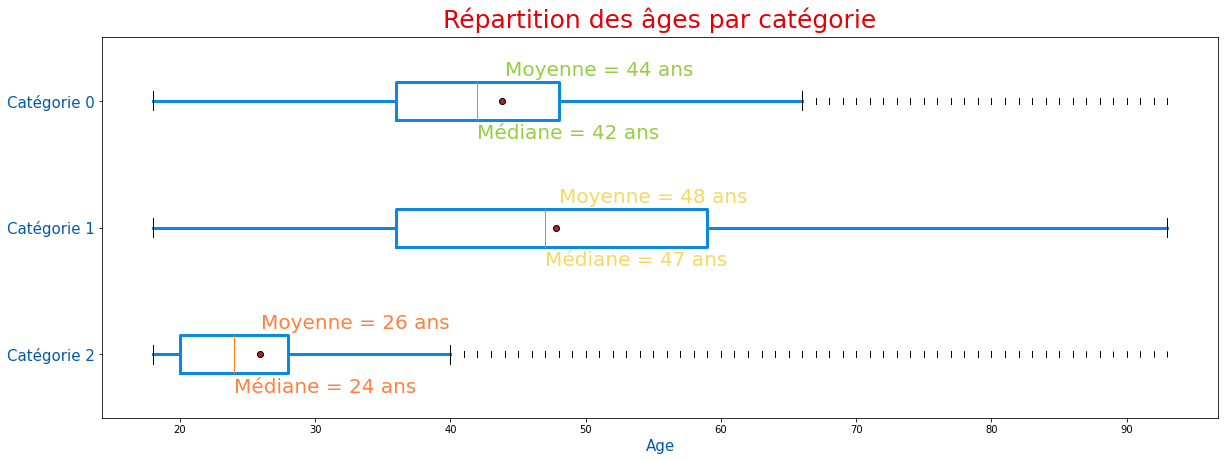

In [105]:
# Age par CATEG
categ_0_age = base.age.loc[base['categ'] == 0]
categ_1_age= base.age.loc[base['categ'] == 1]
categ_2_age = base.age.loc[base['categ'] == 2]

moy_cat0 = round(categ_0_age.mean())
moy_cat1 = round(categ_1_age.mean())
moy_cat2 = round(categ_2_age.mean())

med_cat0 = round(categ_0_age.median())
med_cat1 = round(categ_1_age.median())
med_cat2 = round(categ_2_age.median())

donnee = [categ_2_age , categ_1_age , categ_0_age]

boite = dict( linewidth = 3, color='#0B89E1')
moyenne = dict(marker = 'o', markeredgecolor = 'black', markerfacecolor = 'firebrick')
petit_rond = dict(markerfacecolor='r', marker='|' , color='b')
divers = dict(linewidth = 3, color='#0B89E1')

plt.subplots(figsize=(20, 7))
a = plt.boxplot(donnee, boxprops = boite ,  vert=False , showmeans=True , flierprops = petit_rond, meanprops = moyenne, whiskerprops = divers )
plt.title("Répartition des âges par catégorie", color = '#E50007', fontsize = 25, pad = 10)
plt.xlabel("Age", color = '#0359AA', fontsize = 15)
plt.yticks([1, 2, 3], ['Catégorie 2', 'Catégorie 1', 'Catégorie 0'], fontsize = 15 , color = '#0359AA')
plt.text(44 , 3.2 , 'Moyenne = ' + str(moy_cat0) + ' ans', fontsize = 20 , color = '#95CD41')
plt.text(42 , 2.7 , 'Médiane = ' + str(med_cat0) + ' ans', fontsize = 20 , color = '#95CD41')
plt.text(48 , 2.2 , 'Moyenne = ' + str(moy_cat1) + ' ans', fontsize = 20 , color = '#F6D860')
plt.text(47 , 1.7 , 'Médiane = ' + str(med_cat1) + ' ans', fontsize = 20 , color = '#F6D860')
plt.text(26 , 1.2 , 'Moyenne = ' + str(moy_cat2) + ' ans', fontsize = 20 , color = '#FF7F3F')
plt.text(24 , 0.7 , 'Médiane = ' + str(med_cat2) + ' ans', fontsize = 20 , color = '#FF7F3F')
plt.savefig("4 - Export Graphs/Graphique_Julie_Répartition_age_catégorie.png", dpi = 100)
plt.show()

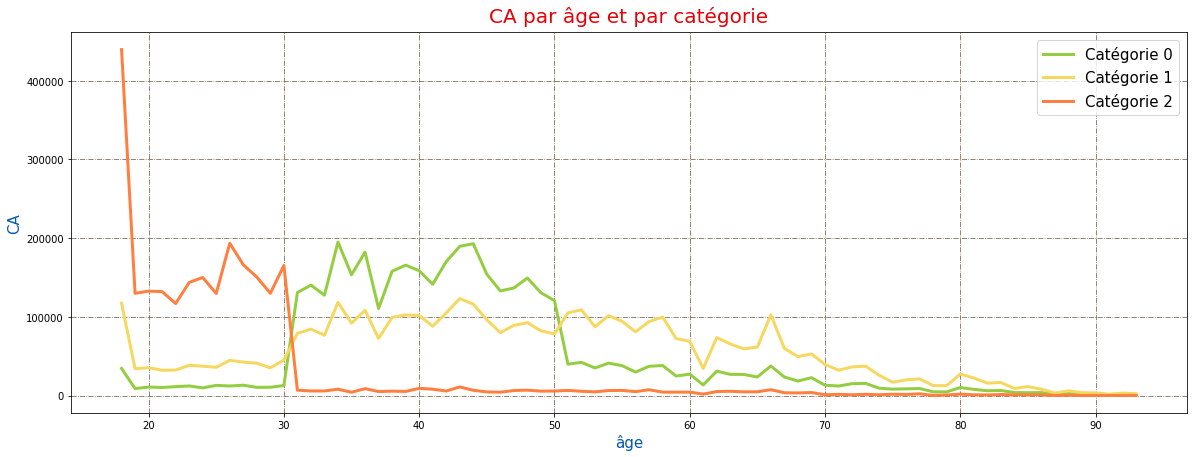

In [65]:
### ------------------------------------ Graph ---------------------------------------  ###
fig = plt.figure(figsize= (20,7))
plt.plot(age_categ_0['age'], age_categ_0['ca'], c = '#95CD41' , linewidth = 3)
plt.plot(age_categ_1['age'], age_categ_1['ca'], c = '#F6D860' , linewidth = 3)
plt.plot(age_categ_2['age'], age_categ_2['ca'], c = '#FF7F3F' , linewidth = 3)
plt.legend(labels = ['Catégorie 0' , 'Catégorie 1', 'Catégorie 2'], fontsize = 15, loc = 'upper right')
plt.title("CA par âge et par catégorie", color = '#E50007', fontsize = 20, pad = 10)
plt.xlabel("âge", color = '#0359AA', fontsize = 15)
plt.ylabel("CA", color = '#0359AA', fontsize = 15)
plt.grid(axis = 'x' , linestyle = '-.' , color = '#7A6755' )
plt.grid(axis = 'y' , linestyle = '-.' , color = '#7A6755' )
plt.savefig("4 - Export Graphs/Graphique_Julie_CA_Age_Categorie.png", dpi = 100)
plt.show()